<a href="https://colab.research.google.com/github/VigaNik/AbsorvePDFdata/blob/main/HeartDiseaseUL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Starting

In [1]:
import os
import pandas as pd
import kagglehub

import kagglehub

# Download latest version
path = kagglehub.dataset_download("kamilpytlak/personal-key-indicators-of-heart-disease")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/personal-key-indicators-of-heart-disease


In [2]:
files = os.listdir(path)
print("Files in folder:", files)

Files in folder: ['2020', '2022']


In [3]:
files = os.listdir(path+'/2020')
print("Files after extraction", files)


Files after extraction ['heart_2020_cleaned.csv']


In [4]:
csv_files = [f for f in files if f.endswith('.csv')]
print("CSV fail:", csv_files[0])

CSV fail: heart_2020_cleaned.csv


In [5]:
csv_file = os.path.join(path, '2020', csv_files[0])
df = pd.read_csv(csv_file)



In [6]:
# Display the first 5 rows of the dataset
print("\n📄 First 5 rows of the dataset:")
print(df.head())

# Show general information about the dataset
print("\nℹ️ General information about the dataset:")
df.info()

# Show statistical summary of numerical columns
print("\n📊 Statistical summary of the dataset:")
print(df.describe())



📄 First 5 rows of the dataset:
  HeartDisease    BMI Smoking AlcoholDrinking Stroke  PhysicalHealth  \
0           No  16.60     Yes              No     No             3.0   
1           No  20.34      No              No    Yes             0.0   
2           No  26.58     Yes              No     No            20.0   
3           No  24.21      No              No     No             0.0   
4           No  23.71      No              No     No            28.0   

   MentalHealth DiffWalking     Sex  AgeCategory   Race Diabetic  \
0          30.0          No  Female        55-59  White      Yes   
1           0.0          No  Female  80 or older  White       No   
2          30.0          No    Male        65-69  White      Yes   
3           0.0          No  Female        75-79  White       No   
4           0.0         Yes  Female        40-44  White       No   

  PhysicalActivity  GenHealth  SleepTime Asthma KidneyDisease SkinCancer  
0              Yes  Very good        5.0    Yes    

In [7]:
df.shape

(319795, 18)

#Normalising

In [8]:
df_original = df.copy()

In [9]:
df.replace({'No': 0, 'Yes': 1}, inplace=True)
df['Sex'] = df['Sex'].replace({'Female': 0, 'Male': 1})

<ipython-input-9-38bdd814babf>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace({'No': 0, 'Yes': 1}, inplace=True)
<ipython-input-9-38bdd814babf>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Sex'] = df['Sex'].replace({'Female': 0, 'Male': 1})


In [10]:
import pandas as pd

age_order = ['18-24', '25-29', '30-34', '35-39', '40-44', '45-49', '50-54', '55-59', '60-64', '65-69', '70-74', '75-79', '80 or older']

#df['AgeCategory'] = pd.Categorical(df['AgeCategory'], categories=age_order, ordered=True)
#df['AgeCategory'] = df['AgeCategory'].cat.codes
df['AgeCategoryAvarage'] = df['AgeCategory'].replace({'18-24':21,
                                            '25-29':27,
                                            '30-34':32,
                                            '35-39':37,
                                            '40-44':42,
                                            '45-49':47,
                                            '50-54':52,
                                            '55-59':57,
                                            '60-64':62,
                                            '65-69':67,
                                            '70-74':72,
                                            '75-79':77,
                                            '80 or older':85})

df['AgeCategory'] = df['AgeCategory'].replace({'18-24':0,
                                            '25-29':1,
                                            '30-34':2,
                                            '35-39':3,
                                            '40-44':4,
                                            '45-49':5,
                                            '50-54':6,
                                            '55-59':7,
                                            '60-64':8,
                                            '65-69':9,
                                            '70-74':10,
                                            '75-79':11,
                                            '80 or older':12})

unique_values = df['AgeCategory'].unique()
print(unique_values)

<ipython-input-10-94e40b211fd2>:7: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['AgeCategoryAvarage'] = df['AgeCategory'].replace({'18-24':21,


[ 7 12  9 11  4 10  8  6  5  0  3  2  1]


<ipython-input-10-94e40b211fd2>:21: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['AgeCategory'] = df['AgeCategory'].replace({'18-24':0,


In [11]:
import pandas as pd
def age_category_4(x):
    if x <= 1:         # 18–29
        return 0       # Young
    elif x <= 4:       # 30-45
        return 0.33    # Adult
    elif x <= 7:       # 40–60
        return 0.66    # Middle-aged
    else:              # 55+
        return 1.0     # Senior

df['AgeCategoryGrouped'] = df['AgeCategory'].apply(age_category_4)
print("Возрастные группы:", unique_values)


Возрастные группы: [ 7 12  9 11  4 10  8  6  5  0  3  2  1]


In [12]:
#df.drop('AgeCategory', axis=1, inplace=True)

In [13]:
# Get unique values in the 'Race' column
unique_values = df['Race'].unique()
print("Unique values:", unique_values)

# Define the desired order of race categories
race_order = ['White', 'Black', 'Asian', 'American Indian/Alaskan Native', 'Other', 'Hispanic']

# Ensure 'Race' is treated as a categorical variable with a fixed set of categories
df['Race'] = pd.Categorical(df['Race'], categories=race_order, ordered=False)

# Apply One-Hot Encoding based on the defined race categories
race_dummies = pd.get_dummies(df['Race'], prefix='Race')

# Add the encoded columns back to the original DataFrame
df = pd.concat([df, race_dummies], axis=1)

# Convert boolean columns to integers (0 or 1)
race_cols = [col for col in df.columns if col.startswith('Race_')]
df[race_cols] = df[race_cols].astype(int)

# Display the names of the added columns
print("Added columns:", race_dummies.columns.tolist())


Unique values: ['White' 'Black' 'Asian' 'American Indian/Alaskan Native' 'Other'
 'Hispanic']
Added columns: ['Race_White', 'Race_Black', 'Race_Asian', 'Race_American Indian/Alaskan Native', 'Race_Other', 'Race_Hispanic']


In [14]:
unique_values = df['GenHealth'].unique()
print(unique_values)

# Define the desired order for general health categories
age_order = ['Very good', 'Fair', 'Good', 'Poor', 'Excellent']

# Map general health categories to numerical values
df['GenHealth'] = df['GenHealth'].replace({
    'Very good': 0.75,
    'Fair': 0.25,
    'Good': 0.5,
    'Poor': 0,
    'Excellent': 1,
})

# Check the updated unique values
unique_values = df['GenHealth'].unique()
print(unique_values)


['Very good' 'Fair' 'Good' 'Poor' 'Excellent']
[0.75 0.25 0.5  0.   1.  ]


<ipython-input-14-9a20443c2542>:8: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['GenHealth'] = df['GenHealth'].replace({


In [15]:
# Convert all values to strings to ensure consistency
df['Diabetic'] = df['Diabetic'].astype(str)

# Display current unique values after conversion
unique_values = df['Diabetic'].unique()
print("Original values (after string conversion):", unique_values)

# Define a mapping dictionary to convert all possible categories
diabetic_mapping = {
    '0': 0.0,   # Assuming 0 means "No"
    '1': 1.0,   # Assuming 1 means "Yes"
    'No': 0.0,
    'No, borderline diabetes': 0.33,
    'Yes (during pregnancy)': 0.67,
    'Yes': 1.0
}

# Apply the mapping
df['Diabetic'] = df['Diabetic'].map(diabetic_mapping)

# Check the transformed values
unique_values = df['Diabetic'].unique()
print("Transformed values:", unique_values)


Original values (after string conversion): ['1' '0' 'No, borderline diabetes' 'Yes (during pregnancy)']
Transformed values: [1.   0.   0.33 0.67]


<ipython-input-16-531f83826c23>:18: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


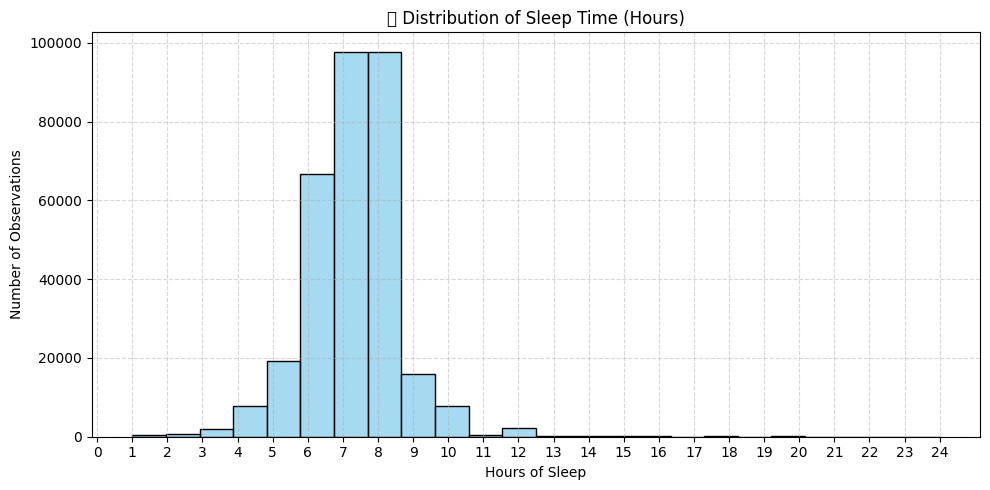

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 5))
sns.histplot(df['SleepTime'], bins=24, kde=False, color='skyblue', edgecolor='black')

# Plot title and axis labels
plt.title("📊 Distribution of Sleep Time (Hours)")
plt.xlabel("Hours of Sleep")
plt.ylabel("Number of Observations")

# X-axis ticks from 0 to 24
plt.xticks(range(0, 25))

# Add grid for better readability
plt.grid(True, linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()


In [17]:
# Check the range of values in the 'SleepTime' column
min_sleep = df['SleepTime'].min()
max_sleep = df['SleepTime'].max()
print(f"Minimum sleep time: {min_sleep} hours")
print(f"Maximum sleep time: {max_sleep} hours")

# Function to assign a sleep score based on the number of hours slept
def sleep_score_v2(hours):
    if 7 <= hours <= 9:
        return 1.0  # Optimal
    elif 6 <= hours < 7 or 9 < hours <= 10:
        return 0.6  # Slight deviation
    elif 5 <= hours < 6 or 10 < hours <= 12:
        return 0.3  # Borderline
    else:
        return 0.0  # Abnormal (too little or too much sleep)

# Apply the scoring function to create a new column
df['SleepTimeScore'] = df['SleepTime'].apply(sleep_score_v2)

Minimum sleep time: 1.0 hours
Maximum sleep time: 24.0 hours


In [18]:
# Check the range of values in the 'MentalHealth' column
min_mental = df['MentalHealth'].min()
max_mental = df['MentalHealth'].max()
print(f"Minimum MentalHealth: {min_mental}")
print(f"Maximum MentalHealth: {max_mental}")

# Normalize values to the [0, 1] range using min-max scaling
df['MentalHealth_normalized'] = (df['MentalHealth'] - min_mental) / (max_mental - min_mental)

# Invert the scale so that 1 = good mental health, 0 = poor mental health
df['MentalHealth_normalized'] = 1 - df['MentalHealth_normalized']

# Check the result
print(f"Minimum normalized value: {df['MentalHealth_normalized'].min()}")
print(f"Maximum normalized value: {df['MentalHealth_normalized'].max()}")

# Display the distribution of normalized values
print(df['MentalHealth_normalized'].describe())

Minimum MentalHealth: 0.0
Maximum MentalHealth: 30.0
Minimum normalized value: 0.0
Maximum normalized value: 1.0
count    319795.000000
mean          0.870054
std           0.265175
min           0.000000
25%           0.900000
50%           1.000000
75%           1.000000
max           1.000000
Name: MentalHealth_normalized, dtype: float64


In [19]:
def mental_health_score(val):
    if val <= 0.2:
        return 0.0     # Severe 24>= days of bed mood
    elif val <= 0.4:
        return 0.25    # Moderate 18>= days of bed mood
    elif val <= 0.6:
        return 0.5     # Average 12>= days of bed mood
    elif val <= 0.8:
        return 0.75    # Good 6>= days of bed mood
    else:
        return 1.0     # Excellent

df['MentalHealthScore'] = df['MentalHealth_normalized'].apply(mental_health_score)


MentalHealth_normalized	number of days

1.0	(1 - 1.0) * 30=0

0.75	(1 - 0.75) * 30 = 7.5

0.5	(1 - 0.5) * 30 = 15

0.25	(1 - 0.25) * 30 = 22.5

0.0	(1 - 0.0) * 30 = 30

In [20]:
# Check the range of values in the 'PhysicalHealth' column
min_physical = df['PhysicalHealth'].min()
max_physical = df['PhysicalHealth'].max()
print(f"Minimum PhysicalHealth: {min_physical}")
print(f"Maximum PhysicalHealth: {max_physical}")

# Normalize values to the [0, 1] range using min-max scaling
df['PhysicalHealth_normalized'] = (df['PhysicalHealth'] - min_physical) / (max_physical - min_physical)

# Invert the scale so that 1 = good physical health, 0 = poor physical health
df['PhysicalHealth_normalized'] = 1 - df['PhysicalHealth_normalized']

# Check the result
print(f"Minimum normalized value: {df['PhysicalHealth_normalized'].min()}")
print(f"Maximum normalized value: {df['PhysicalHealth_normalized'].max()}")

# Display the distribution of normalized values
print(df['PhysicalHealth_normalized'].describe())

Minimum PhysicalHealth: 0.0
Maximum PhysicalHealth: 30.0
Minimum normalized value: 0.0
Maximum normalized value: 1.0
count    319795.000000
mean          0.887610
std           0.265028
min           0.000000
25%           0.933333
50%           1.000000
75%           1.000000
max           1.000000
Name: PhysicalHealth_normalized, dtype: float64


In [21]:
def physical_health_score(val):
    if val <= 0.2:
        return 0.0     # Severe 24-30 days of bed health
    elif val <= 0.4:
        return 0.25    # Moderate 18-23 dyas days of bed health
    elif val <= 0.6:
        return 0.5     # Average 12-17 days of bed health
    elif val <= 0.8:
        return 0.75    # Good 6-11 days of bed health
    else:
        return 1.0     # Excellent 0 days of bed health

df['PhysicalHealthScore'] = df['PhysicalHealth_normalized'].apply(physical_health_score)


In [22]:
# Create a numerical health score based on BMI
def bmi_score(bmi):
    if 18.5 <= bmi <= 24.9:
        return 1.0  # Excellent
    elif 25 <= bmi <= 29.9:
        return 0.6  # Moderate deviation
    elif 17.5 <= bmi < 18.5 or 30 <= bmi < 35:
        return 0.3  # Borderline
    else:
        return 0.0  # Severe deviation

# Apply the scoring function to the BMI column
df['BMIScore'] = df['BMI'].apply(bmi_score)

In [23]:
df_catigorical = df.copy()

df.drop("BMI", axis=1, inplace=True)
df.drop("PhysicalHealth", axis=1, inplace=True)
df.drop("PhysicalHealth_normalized", axis=1, inplace=True)
df.drop("MentalHealth", axis=1, inplace=True)
df.drop("MentalHealth_normalized", axis=1, inplace=True)
df.drop("SleepTime", axis=1, inplace=True)
df.drop("Race", axis=1, inplace=True)
df.drop("AgeCategory", axis=1, inplace=True)
df.drop("AgeCategoryAvarage", axis=1, inplace=True)

#Splited Data By Size or Fithers

In [24]:
# Create a DataFrame for entries where HeartDisease = 0
dfh = df[df['HeartDisease'] == 0].copy()

# Create a DataFrame for entries where HeartDisease = 1
dfs = df[df['HeartDisease'] == 1].copy()


In [25]:
dfh.drop('HeartDisease', axis=1, inplace=True)
dfh.shape

dfs.drop('HeartDisease', axis=1, inplace=True)
dfs.shape

(27373, 22)

In [26]:
len(dfs)

27373

In [27]:
"""
#**All data without HD (HD is target)**
import cudf

df_reduce_sample = df.sample(n=15000, random_state=42)
df_dropHD = df_reduce_sample.copy()
df_dropHD.drop('HeartDisease', axis=1, inplace=True)

df_dropHD = cudf.DataFrame.from_pandas(df_dropHD)
# convert to GPU DataFrame
gdf = cudf.DataFrame.from_pandas(df_reduce_sample)
"""


"\n#**All data without HD (HD is target)**\nimport cudf\n\ndf_reduce_sample = df.sample(n=15000, random_state=42)\ndf_dropHD = df_reduce_sample.copy()\ndf_dropHD.drop('HeartDisease', axis=1, inplace=True)\n\ndf_dropHD = cudf.DataFrame.from_pandas(df_dropHD)\n# convert to GPU DataFrame\ngdf = cudf.DataFrame.from_pandas(df_reduce_sample)\n"

In [28]:

#**All data without HD (HD is target)**
#gdf = cudf.DataFrame.from_pandas(df_reduce_sample)


In [29]:

import cudf
df_reduce_sample = dfs.sample(n=15000, random_state=42)
df_dropHD = df_reduce_sample.copy()
df_dropHD = cudf.DataFrame.from_pandas(df_dropHD)
gdf = cudf.DataFrame.from_pandas(df_reduce_sample)

#Df for saving all clasters

In [30]:
"""
#**All data without HD (HD is target)**
#target = cudf.Series(df['HeartDisease']) # This was the original line causing the error
target = cudf.Series(gdf['HeartDisease']) # Now target is created from gdf, which has the correct length

df_clusters = gdf.to_pandas().copy()
df_clusters['HeartDisease'] = target.to_pandas().values
"""

"\n#**All data without HD (HD is target)**\n#target = cudf.Series(df['HeartDisease']) # This was the original line causing the error\ntarget = cudf.Series(gdf['HeartDisease']) # Now target is created from gdf, which has the correct length\n\ndf_clusters = gdf.to_pandas().copy()\ndf_clusters['HeartDisease'] = target.to_pandas().values\n"

In [31]:
df_clusters = gdf.to_pandas().copy()

#Trustworthiness for UMAP testing

In [ ]:
from sklearn.manifold import trustworthiness
import umap
import cuml.manifold  # Import GPU-accelerated UMAP
import numpy as np
import matplotlib.pyplot as plt

# Initialize the UMAP model with 3 components
umap_model = cuml.manifold.UMAP(n_components=3, random_state=42)

# Define a list of n_neighbors values to evaluate
n_neighbors_values = [25, 50, 90, 120]
trust_scores = []

# Compute trustworthiness for each n_neighbors value
for n_neighbors in n_neighbors_values:
    score = trustworthiness(
        df_dropHD.to_pandas(),
        umap_model.fit_transform(df_dropHD).to_pandas(),
        n_neighbors=n_neighbors
    )
    trust_scores.append(score)
    print(f"Trustworthiness for n_neighbors={n_neighbors}: {score}")

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(n_neighbors_values, trust_scores, marker='o', linestyle='-', color='purple')
plt.title("Trustworthiness vs n_neighbors (UMAP 3D) — Heart Disease Patients (without 'HeartDisease' column)")
plt.xlabel('n_neighbors')
plt.ylabel('Trustworthiness')
plt.ylim(0.8, 1.01)
plt.grid(True, linestyle='--', alpha=0.5)
plt.axhline(y=0.90, color='red', linestyle='--', label='Trust = 0.90')
plt.legend()
plt.tight_layout()
plt.show()

[2025-04-17 18:21:10.892] [CUML] [info] build_algo set to brute_force_knn because random_state is given
Trustworthiness for n_neighbors=25: 0.9819428162010426
Trustworthiness for n_neighbors=50: 0.96118722655142
Trustworthiness for n_neighbors=90: 0.9361070553630761


**econstruction Error (не напрямую в UMAP)**

#Explained Variance Ratio with Scree Plot for PCA

In [ ]:
import pandas as pd
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np

# Copy and convert the data to a pandas DataFrame
X = df_dropHD.copy()
X = X.to_pandas()

# Fit PCA on the dataset
pca = PCA().fit(X)

# Get explained variance and cumulative variance
explained_variance = pca.explained_variance_ratio_
cum_var = explained_variance.cumsum()

# Create a DataFrame to display the results
pca_df = pd.DataFrame({
    'components': range(1, len(explained_variance) + 1),
    'Explained Variance': explained_variance,
    'Cumulative Variance': cum_var
})

# Print the table of explained variance
print(pca_df.to_string(index=False))

# Plot cumulative explained variance
components = pca_df['components']
plt.figure(figsize=(10, 6))
plt.plot(components, cum_var, marker='o', linestyle='-', color='blue')
plt.axhline(y=0.90, color='red', linestyle='--', label='90% variance')
plt.axhline(y=0.95, color='green', linestyle='--', label='95% variance')
plt.xticks(components)
plt.xlabel('Number of PCA Components')
plt.ylabel('Cumulative Explained Variance')
plt.title("Explained Variance vs Number of PCA Components — Heart Disease Patients (without 'HeartDisease' column)")
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend()
plt.tight_layout()
plt.show()


#Elbow Metod

In [ ]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA

# 1. Data preparation (remove target variable)
X = df_dropHD.copy()
X = X.to_pandas()

# Optional: Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA (e.g., keep 14 components)
pca = PCA(n_components=14, random_state=42)
X_pca = pca.fit_transform(X_scaled)

# Elbow Method on PCA-transformed data
inertia = []
k_range = range(1, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_pca)
    inertia.append(kmeans.inertia_)

# Plot inertia vs. number of clusters in PCA space
plt.figure(figsize=(8, 5))
plt.plot(k_range, inertia, 'o-', markerfacecolor='red')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia (in PCA space)')
plt.title('Elbow Method in PCA-Transformed Space')
plt.grid(True, linestyle='--', alpha=0.6)
plt.xticks(k_range)
plt.tight_layout()
plt.show()

# 2. Elbow Method on original scaled data
inertia = []
k_range = range(1, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

# 3. Plot inertia vs. number of clusters on scaled data
plt.figure(figsize=(8, 5))
plt.plot(k_range, inertia, 'o-', markerfacecolor='red')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Within-Cluster Sum of Squares (Inertia)')
plt.title('Elbow Method for Selecting k')
plt.grid(True, linestyle='--', alpha=0.6)
plt.xticks(k_range)
plt.tight_layout()
plt.show()


In [ ]:
from cuml.manifold import UMAP
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import cudf

# 1. Scale the data
X = df_dropHD.to_pandas()
X_scaled = StandardScaler().fit_transform(X)

# 2. Convert to cuDF and apply UMAP on GPU
X_cudf = cudf.DataFrame.from_pandas(pd.DataFrame(X_scaled))
umap_model = UMAP(n_components=3, n_neighbors=90, min_dist=0.1, random_state=42)
X_umap = umap_model.fit_transform(X_cudf).to_pandas()

# 3. Elbow Method after UMAP
inertia = []
k_range = range(1, 10)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_umap)
    inertia.append(kmeans.inertia_)

# 4. Plotting inertia vs. number of clusters
plt.figure(figsize=(8, 5))
plt.plot(k_range, inertia, 'o-', markerfacecolor='blue')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia (after UMAP)')
plt.title('Elbow Method After


#K-Mean+PCA Dimensionality reduction

In [ ]:
import cudf
import cuml
from cuml.cluster import KMeans
from cuml.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Preserve target column if available
if 'HeartDisease' in gdf.columns:
    gdf_copy = gdf.copy()
    target = cudf.Series(df['HeartDisease'])

# Copy feature data (without 'HeartDisease')
X_gpu = df_dropHD.copy()

# Apply PCA on GPU
pca_model = PCA(n_components=13, random_state=42)
X_pca = pca_model.fit_transform(X_gpu)

# Calculate explained variance
explained_variance_ratio = pca_model.explained_variance_ratio_
cum_explained_variance = np.cumsum(explained_variance_ratio.to_pandas())
print(f"Explained variance by PCA components: {explained_variance_ratio.to_pandas()}")
print(f"Cumulative explained variance: {cum_explained_variance}")

# Apply KMeans clustering on PCA-reduced data
kmeans_gpu = KMeans(n_clusters=4, n_init=10, random_state=42)
kmeans_gpu.fit(X_pca)
clusters_KMean_pca = kmeans_gpu.predict(X_pca)

# Convert everything to pandas for analysis
df_sample = gdf.to_pandas()

if 'HeartDisease' in gdf.columns:
    df_sample['HeartDisease'] = target.to_pandas()

df_sample['cluster_kmeans_pca'] = clusters_KMean_pca.to_pandas()
df_clusters['cluster_kmeans_pca'] = clusters_KMean_pca.to_pandas()

# Cluster-wise analysis
for i in range(4):
    cluster_data = df_sample[df_sample['cluster_kmeans_pca'] == i]
    print(f"Cluster {i}:")
    print(f"Number of observations: {len(cluster_data)}")
    print("Mean feature values:")
    print(cluster_data.mean(numeric_only=True))
    if 'HeartDisease' in gdf.columns:
        heart_disease_rate = cluster_data['HeartDisease'].mean() * 100
        print(f"Heart disease rate: {heart_disease_rate:.2f}%")
    print("-" * 60)

# Visualization with centroids
plt.figure(figsize=(10, 8))

X_pca_pd = X_pca.to_pandas()
X_pca_pd.columns = ['PC1', 'PC2'] + [f'PC{i}' for i in range(3, X_pca_pd.shape[1] + 1)]

centroids_pca = kmeans_gpu.cluster_centers_.to_pandas()
centroids_pca.columns = X_pca_pd.columns

palette = sns.color_palette("tab10", len(df_sample['cluster_kmeans_pca'].unique()))

for i, cluster in enumerate(df_sample['cluster_kmeans_pca'].unique()):
    mask = df_sample['cluster_kmeans_pca'] == cluster
    plt.scatter(
        X_pca_pd.loc[mask, 'PC1'],
        X_pca_pd.loc[mask, 'PC2'],
        label=f'Cluster {cluster}',
        color=palette[i],
        alpha=0.6,
        s=30
    )

plt.scatter(
    centroids_pca['PC1'],
    centroids_pca['PC2'],
    color='black',
    marker='X',
    s=200,
    edgecolor='white',
    linewidth=1.5,
    label='Centroids'
)

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('KMeans + PCA: Clusters and Their Centroids')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

# Use PCA-transformed data for metric evaluation
X_for_metrics = X_pca_pd                   # PCA-reduced feature space
labels = clusters_KMean_pca.to_pandas()    # Cluster labels from KMeans

# Compute clustering quality metrics
sil_score = silhouette_score(X_for_metrics, labels)
ch_score = calinski_harabasz_score(X_for_metrics, labels)
db_score = davies_bouldin_score(X_for_metrics, labels)

# Display the results
print("\n Clustering Quality Evaluation for KMeans (after PCA):")
print(f" Silhouette Score: {sil_score:.4f}")
print(f" Calinski-Harabasz Score: {ch_score:.2f}")
print(f" Davies-Bouldin Score: {db_score:.4f}")


 Оценка качества кластеризации KMeans (после PCA):


🟢 Silhouette Score: 0.1647

🟦 Calinski-Harabasz Score: 1603.32

🔴 Davies-Bouldin Score: 1.8375

In [ ]:
df.head()

In [ ]:
# 5. Visualize clustering results in 2D using first two PCA components
pca_2d = PCA(n_components=2, random_state=42)
X_pca_2d = pca_2d.fit_transform(X_gpu)

# Convert to pandas for visualization
X_pca_2d_pd = X_pca_2d.to_pandas()
clusters_pd = clusters_KMean_pca.to_pandas()

# Create side-by-side scatter plots: one colored by clusters, the other by target
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Plot by cluster labels
scatter1 = ax1.scatter(X_pca_2d_pd[0], X_pca_2d_pd[1], c=clusters_pd, cmap='viridis',
                       alpha=0.5, s=5, edgecolors='none')
ax1.set_title('K-Means Clusters on PCA-Reduced Data')
ax1.set_xlabel('Principal Component 1')
ax1.set_ylabel('Principal Component 2')
legend1 = ax1.legend(*scatter1.legend_elements(), title="Clusters")
ax1.add_artist(legend1)

# Plot by presence of heart disease
if 'HeartDisease' in gdf.columns:
    target_pd = target.to_pandas()[X_pca_2d_pd.index]
    scatter2 = ax2.scatter(X_pca_2d_pd[0], X_pca_2d_pd[1], c=target_pd, cmap='coolwarm',
                           alpha=0.5, s=5, edgecolors='none')
    ax2.set_title('Heart Disease Presence on PCA-Reduced Data')
    ax2.set_xlabel('Principal Component 1')
    ax2.set_ylabel('Principal Component 2')
    legend2 = ax2.legend(*scatter2.legend_elements(), title="Heart Disease")
    ax2.add_artist(legend2)
else:
    scatter2 = ax2.scatter(X_pca_2d_pd[0], X_pca_2d_pd[1], cmap='coolwarm',
                           alpha=0.5, s=5, edgecolors='none')
    ax2.set_title('Condition Presence on PCA-Reduced Data')
    ax2.set_xlabel('Principal Component 1')
    ax2.set_ylabel('Principal Component 2')

plt.tight_layout()
plt.savefig('pca_kmeans_clusters.png', dpi=300)
plt.show()

# 6. Compare cluster profiles
cluster_profiles = []
for i in range(4):
    cluster_data = df_sample[df_sample['cluster_kmeans_pca'] == i]
    cluster_profile = cluster_data.mean(numeric_only=True)
    cluster_profile['cluster'] = i
    cluster_profile['size'] = len(cluster_data)
    if 'HeartDisease' in gdf.columns:
        cluster_profile['heart_disease_rate'] = cluster_data['HeartDisease'].mean() * 100
    cluster_profiles.append(cluster_profile)

# Create DataFrame from cluster profiles
cluster_profiles_df = pd.DataFrame(cluster_profiles).set_index('cluster')
print("\n📊 Cluster Profiles:")
print(cluster_profiles_df)

# 7. Analyze distribution of categorical features across clusters
categorical_features = [
    'Smoking', 'AlcoholDrinking', 'Stroke', 'DiffWalking', 'Sex',
    'Race_White', 'Race_Black', 'Race_Asian', 'Race_Hispanic',
    'Race_American Indian/Alaskan Native', 'Diabetic', 'PhysicalActivity',
    'GenHealth', 'Asthma', 'KidneyDisease', 'SkinCancer',
    'AgeCategoryGrouped', 'SleepTimeScore', 'MentalHealthScore',
    'PhysicalHealthScore', 'BMIScore'
]

for feature in categorical_features:
    print(f"\n Distribution of {feature} across clusters:")
    # Create pivot table for percentage distribution
    distribution = pd.crosstab(df_sample['cluster_kmeans_pca'], df_sample[feature], normalize='index') * 100
    print(distribution)

    # Plot the distribution
    plt.figure(figsize=(12, 6))
    distribution.plot(kind='bar', stacked=True)
    plt.title(f'Distribution of {feature} by Cluster')
    plt.xlabel('Cluster')
    plt.ylabel('Percentage')
    plt.legend(title=feature, bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.savefig(f'distribution_{feature}_by_cluster.png', dpi=300)
    plt.show()


to long more than 5 minute but work well

#UMAP визуализация кластеров with K-Mean+UMAP Снижение размерности


In [ ]:
import cudf
import cuml
from cuml.cluster import KMeans
from cuml.manifold import UMAP
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Copy the original data
gdf_copy = gdf.copy()
X_gpu = df_dropHD.copy()

# Extract the target column if available
if 'HeartDisease' in gdf.columns:
    target = cudf.Series(gdf['HeartDisease'])  # Target variable (cuDF Series)

# 1. Dimensionality reduction using UMAP
umap_model = UMAP(n_components=3, n_neighbors=50, min_dist=0.2, random_state=42)
X_umap = umap_model.fit_transform(X_gpu)

# 2. KMeans clustering on the UMAP-reduced space
kmeans_gpu = KMeans(n_clusters=6, n_init=10, random_state=42)
kmeans_gpu.fit(X_umap)
clusters_KMean_umap = kmeans_gpu.predict(X_umap)

# 3. Convert data to pandas for analysis
df_sample = gdf.to_pandas()

if 'HeartDisease' in gdf.columns:
    df_sample['HeartDisease'] = target.to_pandas()

df_sample['cluster_kmeans_umap'] = clusters_KMean_umap.to_pandas()
df_clusters['cluster_kmeans_umap'] = clusters_KMean_umap.to_pandas()

# 4. Cluster-wise analysis
for i in range(6):  # Changed from range(4) to 6 since n_clusters=6
    cluster_data = df_sample[df_sample['cluster_kmeans_umap'] == i]
    print(f"Cluster {i}:")
    print(f"Number of observations: {len(cluster_data)}")
    print("Average feature values:")
    print(cluster_data.mean(numeric_only=True))
    if 'HeartDisease' in gdf.columns:
        heart_disease_rate = cluster_data['HeartDisease'].mean() * 100
        print(f"Heart disease rate: {heart_disease_rate:.2f}%")
    print("-" * 60)

# 5. Append UMAP coordinates
umap_df = X_umap.to_pandas()
df_sample['UMAP1'] = umap_df[0]
df_sample['UMAP2'] = umap_df[1]

# Get centroids from trained KMeans model
centroids_umap = kmeans_gpu.cluster_centers_.to_pandas()
centroids_umap.columns = ['UMAP1', 'UMAP2', 'UMAP3']  # Adjust based on n_components

# 6. Visualize clusters with centroids
plt.figure(figsize=(12, 8))
palette = sns.color_palette("tab10", len(df_sample['cluster_kmeans_umap'].unique()))

for i in range(len(centroids_umap)):
    cluster_data = df_sample[df_sample['cluster_kmeans_umap'] == i]
    plt.scatter(cluster_data['UMAP1'], cluster_data['UMAP2'], label=f'Cluster {i}',
                color=palette[i], alpha=0.6, s=30)

# Plot centroids
plt.scatter(
    centroids_umap['UMAP1'],
    centroids_umap['UMAP2'],
    color='black',
    marker='X',
    s=200,
    edgecolor='white',
    linewidth=1.5,
    label='Centroids'
)

plt.title('KMeans Clusters (UMAP-reduced space) with Centroids')
plt.xlabel('UMAP 1')
plt.ylabel('UMAP 2')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

In [ ]:
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

# Convert UMAP-transformed data and labels to numpy-compatible format
X_umap_np = X_umap.to_pandas().values
labels = clusters_KMean_umap.to_pandas().values

# Compute clustering evaluation metrics
sil_score = silhouette_score(X_umap_np, labels)
ch_score = calinski_harabasz_score(X_umap_np, labels)
db_score = davies_bouldin_score(X_umap_np, labels)

# Display results
print("\n Clustering Quality Evaluation for KMeans (after UMAP):")
print(f"Silhouette Score: {sil_score:.4f}")
print(f"Calinski-Harabasz Score: {ch_score:.2f}")
print(f"Davies-Bouldin Score: {db_score:.4f}")


In [ ]:
if 'HeartDisease' in gdf.columns:
  #All data without HD (HD is target)**
  import seaborn as sns

  cluster_hd_rate = df_sample.groupby('cluster_kmeans_umap')['HeartDisease'].mean().reset_index()
  cluster_hd_rate['HeartDisease'] *= 100

  plt.figure(figsize=(8, 5))
  sns.barplot(data=cluster_hd_rate, x='cluster_kmeans_umap', y='HeartDisease')
  plt.title('Procent HeartDisease in clasters')
  plt.ylabel('Heart Disease (%)')
  plt.xlabel('Кластер')
  plt.grid(True, linestyle='--', alpha=0.6)
  plt.show()


#Иерархическая кластеризация

In [ ]:
#df_clusters.drop(columns=['cluster_kmeans_umap'], inplace=True)

In [ ]:
# Imports
import cudf
import cuml
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Extract target column if present
if 'HeartDisease' in gdf.columns:
    target = cudf.Series(gdf['HeartDisease'])  # Target variable

# Data preparation and sampling
gdf_copy = df_dropHD

if len(gdf_copy) > 30000:
    gdf_sample = gdf_copy.sample(n=30000, random_state=42)
else:
    gdf_sample = gdf_copy

if 'HeartDisease' in gdf.columns:
    target_sample = target.loc[gdf_sample.index]

# Feature scaling (on CPU)
X_scaled = StandardScaler().fit_transform(gdf_sample.to_pandas())

# Reduce dimensionality with PCA (e.g., 13 components ≈ 95% variance)
pca = PCA(n_components=13, random_state=42)
X_pca = pca.fit_transform(X_scaled)

# Convert to pandas DataFrame and append target
df_sample = gdf_sample.to_pandas().copy()
if 'HeartDisease' in gdf.columns:
    df_sample['HeartDisease'] = target_sample.to_pandas().values

# 🚀 Ward linkage clustering in PCA space
print("🔍 Method: Ward + PCA")
ward_model = AgglomerativeClustering(
    n_clusters=6,
    linkage='ward',
    compute_distances=True
)
ward_labels = ward_model.fit_predict(X_pca)

# Store clustering results
df_sample["ward_cluster"] = ward_labels
df_clusters['ward_cluster'] = ward_labels

# Distribution of samples per cluster
print("\n📊 Cluster distribution (Ward + PCA):")
print(df_sample["ward_cluster"].value_counts().sort_index())

# Heart disease rates per cluster
if 'HeartDisease' in gdf.columns:
    print("\n Heart Disease Rate per Cluster:")
    for i in range(4):  # Use range(6) if you want all clusters
        mask = df_sample["ward_cluster"] == i
        rate = df_sample.loc[mask, "HeartDisease"].mean() * 100
        print(f"Cluster {i}: {rate:.2f}% ({mask.sum()} samples)")

# 📈 Dendrogram for Ward clustering
def plot_dendrogram(model, **kwargs):
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack([model.children_, model.distances_, counts]).astype(float)

    plt.figure(figsize=(12, 8))
    dendrogram(linkage_matrix, **kwargs)
    plt.title('📊 Dendrogram (Ward + PCA)', fontsize=16)
    plt.xlabel('Sample Index or Cluster')
    plt.ylabel('Distance')
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.tight_layout()
    plt.show()

# Plot the dendrogram
plot_dendrogram(ward_model, truncate_mode='level', p=5)

In [ ]:
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

# Use PCA-transformed data and cluster labels
X_for_metrics = X_pca           # PCA-reduced feature space
labels = ward_labels            # Cluster labels from Ward clustering

# Compute clustering quality metrics
sil_score = silhouette_score(X_for_metrics, labels)
ch_score = calinski_harabasz_score(X_for_metrics, labels)
db_score = davies_bouldin_score(X_for_metrics, labels)

# Display the results
print("\nClustering Quality Evaluation for Ward (after PCA):")
print(f"Silhouette Score: {sil_score:.4f}")
print(f"Calinski-Harabasz Score: {ch_score:.2f}")
print(f"Davies-Bouldin Score: {db_score:.4f}")


In [ ]:
from scipy.cluster.hierarchy import linkage, fcluster

# Perform hierarchical clustering (Ward linkage) on PCA-reduced data
Z = linkage(X_pca, method='ward')

# Cut the dendrogram by distance threshold (e.g., t=50)
labels_auto = fcluster(Z, t=50, criterion='distance')

# Alternatively, cut by the desired number of clusters:
# labels_auto = fcluster(Z, t=5, criterion='maxclust')

# Print the resulting cluster labels
print("Clusters (fcluster):", np.unique(labels_auto))


In [ ]:
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE  # Import t-SNE

# Apply t-SNE on PCA-reduced data
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X_pca)

# Add t-SNE components to the DataFrame
df_sample['TSNE1'] = X_tsne[:, 0]
df_sample['TSNE2'] = X_tsne[:, 1]

# Scatter plot of clusters in t-SNE space
plt.figure(figsize=(12, 8))
plt.scatter(
    df_sample['TSNE1'],
    df_sample['TSNE2'],
    c=df_sample['ward_cluster'],
    cmap='tab10',
    s=10,
    alpha=0.7
)
plt.colorbar(label='Ward Cluster')
plt.title("t-SNE Visualization of Clusters (Ward + fcluster)")
plt.xlabel("TSNE-1")
plt.ylabel("TSNE-2")
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()



📈 Оценка качества кластеризации Ward (после UMAP):
🟢 Silhouette Score: -0.0506
🟦 Calinski-Harabasz Score: 16.77
🔴 Davies-Bouldin Score: 15.9426

Silhouette Score	Насколько хорошо объекты соответствуют своему кластеру (больше — лучше, макс = 1)

Calinski-Harabasz Score	Отношение межкластерной дисперсии к внутрикластерной (больше — лучше)

Davies-Bouldin Score	Мера средних расстояний между кластерами (меньше — лучше)

In [ ]:
# Detailed analysis of Ward clusters
print("Detailed analysis of Ward clustering:")

for i in range(4):  # Change to range(6) if there are 6 clusters
    cluster_data = df_clusters[df_clusters['ward_cluster'] == i]
    print(f"\nCluster {i} ({len(cluster_data)} observations):")

    # Uncomment the line below to include heart disease analysis (if available)
    # print(f"Percentage of patients with heart disease: {cluster_data['HeartDisease'].mean()*100:.2f}%")

    # Analysis of key features
    print("Mean values of key features:")
    print(cluster_data[[
        'Smoking', 'AlcoholDrinking', 'Stroke', 'DiffWalking', 'Sex',
        'Race_White', 'Race_Black', 'Race_Asian', 'Race_Hispanic',
        'Race_American Indian/Alaskan Native', 'Diabetic', 'PhysicalActivity',
        'GenHealth', 'Asthma', 'KidneyDisease', 'SkinCancer',
        'AgeCategoryGrouped', 'SleepTimeScore', 'MentalHealthScore',
        'PhysicalHealthScore', 'BMIScore'
    ]].mean())

    # Analysis of binary/categorical features
    binary_features = [
        'Smoking', 'AlcoholDrinking', 'Stroke', 'DiffWalking', 'Sex',
        'PhysicalActivity', 'Asthma', 'KidneyDisease', 'SkinCancer'
    ]

    print("Percentage of binary/categorical features:")
    for feature in binary_features:
        if feature in df_sample.columns:
            print(f"{feature}: {cluster_data[feature].mean() * 100:.2f}%")

    print("-" * 50)


#DBSCAN+UMAP (кластеризация на основе плотности).

In [ ]:
import cudf
import cuml
from cuml.manifold import UMAP
from cuml.cluster import DBSCAN
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D

# Extract target variable if available
if 'HeartDisease' in gdf.columns:
    target = cudf.Series(gdf['HeartDisease'])

# 1. Remove target variable from features
gdf_features = df_dropHD.copy()
X_gpu = gdf_features

# 2. Dimensionality reduction using UMAP on GPU
umap_gpu = UMAP(n_components=3, n_neighbors=50, min_dist=0.1, metric='euclidean', random_state=42)
X_umap_gpu = umap_gpu.fit_transform(X_gpu)

# 3. DBSCAN clustering on UMAP-reduced data
dbscan_gpu = DBSCAN(eps=1, min_samples=30)
dbscan_labels = dbscan_gpu.fit_predict(X_umap_gpu)

# 4. Convert everything to pandas
if 'HeartDisease' in gdf.columns:
    df_sample['HeartDisease'] = target.to_pandas()

df_sample['dbscan_cluster'] = dbscan_labels.to_pandas()
df_clusters['dbscan_cluster'] = dbscan_labels.to_pandas()

# 5. Cluster analysis
n_clusters = len(set(dbscan_labels.to_pandas())) - (1 if -1 in dbscan_labels.to_pandas() else 0)
n_noise = (dbscan_labels.to_pandas() == -1).sum()

print(f"DBSCAN identified {n_clusters} clusters and {n_noise} noise points\n")

if 'HeartDisease' in gdf.columns:
    print("📊 Heart Disease Rate by DBSCAN Cluster:")

    for i in sorted(set(dbscan_labels.to_pandas())):
        mask = df_sample['dbscan_cluster'] == i
        cluster_size = mask.sum()
        if cluster_size == 0:
            continue
        rate = df_sample.loc[mask, 'HeartDisease'].mean() * 100
        label = f"Cluster {i}" if i != -1 else "Noise (-1)"
        print(f"{label}: {rate:.2f}% ({cluster_size} samples)")

# 6. Visualization in 3D
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(
    X_umap_gpu.to_pandas().iloc[:, 0],
    X_umap_gpu.to_pandas().iloc[:, 1],
    X_umap_gpu.to_pandas().iloc[:, 2],
    c=dbscan_labels.to_pandas(),
    cmap='tab10',
    s=10,
    alpha=0.6
)

plt.title("DBSCAN Clusters with UMAP Dimensionality Reduction")
plt.xlabel("UMAP-1")
plt.ylabel("UMAP-2")
ax.set_zlabel("UMAP-3")
plt.grid(True, linestyle='--', alpha=0.5)
plt.colorbar(scatter, label="DBSCAN Cluster")
plt.show()


In [ ]:
from sklearn.neighbors import NearestNeighbors
import numpy as np
import matplotlib.pyplot as plt

# Convert the cuDF DataFrame to pandas before fitting
X_umap_pd = X_umap_gpu.to_pandas()

# Initialize Nearest Neighbors with k=30
neighbors = NearestNeighbors(n_neighbors=30)
neighbors_fit = neighbors.fit(X_umap_pd)
distances, indices = neighbors_fit.kneighbors(X_umap_pd)

# Sort distances to the 30th nearest neighbor
distances = np.sort(distances[:, -1])

# Plot k-distance graph
plt.figure(figsize=(8, 4))
plt.plot(distances)
plt.title("k-Distance Graph (for Selecting eps)")
plt.xlabel("Sample Index")
plt.ylabel("Distance to 30th Nearest Neighbor")
plt.grid(True)
plt.show()


In [ ]:
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

# Convert UMAP-transformed data and cluster labels to numpy arrays
X_umap_np = X_umap_gpu.to_pandas().values
labels = dbscan_labels.to_pandas().values

# Compute clustering evaluation metrics
sil_score = silhouette_score(X_umap_np, labels)
ch_score = calinski_harabasz_score(X_umap_np, labels)
db_score = davies_bouldin_score(X_umap_np, labels)

# Display results
print("\n Clustering Quality Evaluation for DBSCAN (after UMAP):")
print(f"Silhouette Score: {sil_score:.4f}")
print(f"Calinski-Harabasz Score: {ch_score:.2f}")
print(f"Davies-Bouldin Score: {db_score:.4f}")


In [ ]:
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.metrics import pairwise_distances
import matplotlib.pyplot as plt

# Assume X_umap_gpu and dbscan_labels are available as pandas objects
X_umap_pd = X_umap_gpu.to_pandas()
labels_pd = dbscan_labels.to_pandas()

# Filter out noise points (cluster -1)
mask = labels_pd != -1
X_clusters = X_umap_pd[mask]
labels_clusters = labels_pd[mask]

# Compute centroids for each cluster
cluster_ids = sorted(set(labels_clusters))
centroids = []

for cluster_id in cluster_ids:
    cluster_points = X_clusters[labels_clusters == cluster_id]
    centroid = cluster_points.mean(axis=0)
    centroids.append(centroid)

centroids = np.vstack(centroids)

# Compute pairwise distances and build linkage matrix
linked = linkage(centroids, method='ward')

# Plot dendrogram
plt.figure(figsize=(12, 6))
dendrogram(linked, labels=[f'C{i}' for i in cluster_ids])
plt.title("Dendrogram of DBSCAN Clusters (Centroids in UMAP Space)")
plt.xlabel("Cluster")
plt.ylabel("Distance")
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


In [ ]:
!pip install kneed

In [ ]:
from kneed import KneeLocator

distances = linked[::-1, 2]
kneedle = KneeLocator(range(1, len(distances)+1), distances, curve='convex', direction='decreasing')
optimal_k = kneedle.knee
print(f"Optimal namber of meta-clasters: {optimal_k}")


In [ ]:
from scipy.cluster.hierarchy import linkage, fcluster
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Convert UMAP-reduced data and DBSCAN labels to pandas
X_umap_metha = X_umap_gpu.to_pandas()
labels = dbscan_labels.to_pandas()

# Remove noise points and compute cluster centroids
mask = labels != -1
X_clusters = X_umap_metha[mask]
labels_clusters = labels[mask]

cluster_ids = sorted(set(labels_clusters))
centroids = []

for cluster_id in cluster_ids:
    cluster_points = X_clusters[labels_clusters == cluster_id]
    centroid = cluster_points.mean(axis=0)
    centroids.append(centroid)

centroids = np.vstack(centroids)

# Perform hierarchical clustering on the centroids
linked = linkage(centroids, method='ward')

# Define number of meta-clusters
N_META = 11
meta_labels = fcluster(linked, t=N_META, criterion='maxclust') - 1

# Create mapping: DBSCAN cluster ID → meta-cluster ID
meta_map = dict(zip(cluster_ids, meta_labels))

# Map DBSCAN clusters to meta-clusters in the DataFrame
df_sample['dbscan_meta_cluster'] = df_sample['dbscan_cluster'].map(meta_map)
df_clusters['dbscan_meta_cluster'] = df_sample['dbscan_meta_cluster']

# Evaluate meta-clustering quality
X_filtered = X_umap_metha[labels != -1].values
meta_cluster_labels = df_sample.loc[labels != -1, 'dbscan_meta_cluster'].values

sil_score = silhouette_score(X_filtered, meta_cluster_labels)
ch_score = calinski_harabasz_score(X_filtered, meta_cluster_labels)
db_score = davies_bouldin_score(X_filtered, meta_cluster_labels)

meta_metrics = {
    "Silhouette Score": sil_score,
    "Calinski-Harabasz Score": ch_score,
    "Davies-Bouldin Score": db_score
}

# Display metrics as a table
pd.DataFrame([meta_metrics])


In [ ]:

# 3D vizualisasion
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# scatter = ax.scatter(X_mock[:, 0], X_mock[:, 1], X_mock[:, 2],  # This was the original line causing the error
scatter = ax.scatter(X_filtered[:, 0], X_filtered[:, 1], X_filtered[:, 2], # Changed X_mock to X_filtered
                     c=meta_cluster_labels, cmap='tab10', s=10, alpha=0.6)

ax.set_title("DBSCAN Meta-Clusters from around 70 clusters → 11 meta-group")
ax.set_xlabel("UMAP-1")
ax.set_ylabel("UMAP-2")
ax.set_zlabel("UMAP-3")

plt.colorbar(scatter, label="Meta-Cluster")
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

In [ ]:
import pandas as pd
import cudf
from cuml.manifold import UMAP
import matplotlib.pyplot as plt

# Ensure clustering results are available
assert 'df_sample' in locals() and 'dbscan_cluster' in df_sample.columns, \
    "Data not loaded or 'dbscan_cluster' column missing."

# Separate cluster 0 from the rest
cluster_0 = df_sample[df_sample['dbscan_cluster'] == 0]
others = df_sample[df_sample['dbscan_cluster'] != 0]

# Select normalized features for UMAP embedding
features = [
    'Smoking', 'AlcoholDrinking', 'Stroke',
    'DiffWalking', 'Sex', 'Race_White', 'Race_Black', 'Race_Asian',
    'Race_Hispanic', 'Race_American Indian/Alaskan Native', 'Diabetic',
    'PhysicalActivity', 'GenHealth', 'Asthma',
    'KidneyDisease', 'SkinCancer', 'AgeCategoryGrouped',
    'SleepTimeScore', 'MentalHealthScore',
    'PhysicalHealthScore', 'BMIScore'
]

X = df_sample[features]

# Apply UMAP for 2D embedding
umap = UMAP(n_components=2, n_neighbors=15, min_dist=0.8, random_state=42)
embedding = umap.fit_transform(gdf).to_pandas()  # gdf must contain the same features as df_sample
embedding.columns = ['UMAP1', 'UMAP2']

# Add UMAP results to the visualization DataFrame
df_vis = df_sample.copy()
df_vis[['UMAP1', 'UMAP2']] = embedding

# Highlight cluster 0 in red, others in gray
df_vis['color'] = df_vis['dbscan_cluster'].apply(lambda x: 'red' if x == 0 else 'lightgray')

# Visualization
plt.figure(figsize=(12, 8))
plt.scatter(df_vis['UMAP1'], df_vis['UMAP2'], c=df_vis['color'], alpha=0.6, s=10)
plt.title('UMAP Projection Highlighting Cluster 0')
plt.xlabel('UMAP 1')
plt.ylabel('UMAP 2')
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()


In [ ]:

!pip install ace_tools


In [ ]:
import pandas as pd

#List of categorical and binary features
categorical_cols = [
    'HeartDisease', 'Smoking', 'AlcoholDrinking', 'Stroke',
    'DiffWalking', 'Sex', 'Race', 'Diabetic',
    'PhysicalActivity', 'GenHealth', 'Asthma',
    'KidneyDisease', 'SkinCancer', 'AgeCategoryGrouped',
    'SleepTimeScore', 'MentalHealthScore',
    'PhysicalHealthScore', 'BMIScore'
]

# Top differing features (by absolute mean difference)
diffs = {}
for col in df.select_dtypes(include='number').columns:
    if col not in ['HeartDisease', 'dbscan_cluster']:
        cluster_0_mean = cluster_0[col].mean()
        others_mean = others[col].mean()
        diff = abs(cluster_0_mean - others_mean)
        diffs[col] = diff

top_diff_features = sorted(diffs.items(), key=lambda x: x[1], reverse=True)[:10]
top_diff_df = pd.DataFrame(top_diff_features, columns=["Feature", "AbsDifference"])

print("\n Top 10 Features Differing Most (Cluster 0 vs Others):")
display(top_diff_df)

# Cluster 0 profile across categorical features
profile = {}
for col in categorical_cols:
    if col in cluster_0.columns:
        profile[col] = cluster_0[col].value_counts(normalize=True).round(3)

profile_df = pd.DataFrame(profile).fillna(0).T

print("\nCluster 0 Profile (Categorical Features):")
display(profile_df)

# Indices of observations in Cluster 0
cluster_0_indices = cluster_0.index.to_list()
index_df = pd.DataFrame(cluster_0_indices, columns=["Index in Original Dataset"])

print("\n Indices of All Points in Cluster 0:")
display(index_df)


#GMM+UMAP+CENTROID+Find optimal components(BIC) for gmm number of clusters  


In [ ]:
#df_clusters.drop(columns=['gmm_cluster_centroid'], inplace=True)

In [ ]:
#df_clusters = df_clusters.join(df[['HeartDisease']], how='right')

In [ ]:
# Combined script: Optimal GMM clustering with UMAP + centroid analysis + visualization

import cudf
import cuml
from cuml.manifold import UMAP
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from scipy.spatial.distance import pdist, squareform

# Load and preprocess data
if 'HeartDisease' in gdf.columns:
    target = gdf['HeartDisease']

gdf_copy = df_dropHD
if len(gdf_copy) > 35000:
    gdf_sample = gdf_copy.sample(n=35000, random_state=42)
else:
    gdf_sample = gdf_copy

if 'HeartDisease' in gdf.columns:
    target_sample = target.loc[gdf_sample.index]

# Standardize features on CPU
X_scaled = StandardScaler().fit_transform(gdf_sample.to_pandas())
X_cudf = cudf.DataFrame.from_pandas(pd.DataFrame(X_scaled))

# UMAP dimensionality reduction on GPU
umap_model = UMAP(n_components=15, n_neighbors=40, min_dist=0.2, random_state=42)
X_umap_gmm = umap_model.fit_transform(X_cudf).to_pandas()

# Function to find elbow point for optimal GMM components
def find_elbow(x, y):
    x_norm = (x - np.min(x)) / (np.max(x) - np.min(x))
    y_norm = (y - np.min(y)) / (np.max(y) - np.min(y))
    p1 = np.array([x_norm[0], y_norm[0]])
    p2 = np.array([x_norm[-1], y_norm[-1]])
    distances = [np.abs(np.cross(p2-p1, p1 - np.array([x, y]))) / np.linalg.norm(p2 - p1)
                 for x, y in zip(x_norm, y_norm)]
    return x[np.argmax(distances)]

# Fit GMM models and find optimal number of components
def find_optimal_components(X, n_components_range=range(2, 20), random_state=42):
    bic = []
    gmm_models = {}
    for n in n_components_range:
        try:
            gmm = GaussianMixture(n_components=n, covariance_type='full', random_state=random_state)
            gmm.fit(X)
            bic_score = gmm.bic(X)
            bic.append(bic_score)
            gmm_models[n] = gmm
            print(f"GMM for {n} components: BIC = {bic_score:.2f}")
        except Exception as e:
            bic.append(np.inf)
            print(f"Error for n_components={n}: {e}")

    optimal_n = find_elbow(np.array(list(n_components_range)), np.array(bic))
    print(f"Optimal number of components (elbow method): {optimal_n}")

    # Plot BIC curve
    plt.figure(figsize=(10, 6))
    plt.plot(n_components_range, bic, 'o-')
    plt.axvline(x=optimal_n, color='r', linestyle='--', label=f'Optimal n = {optimal_n}')
    plt.xlabel('Number of GMM components')
    plt.ylabel('BIC')
    plt.title('BIC across GMM components')
    plt.grid(True)
    plt.legend()
    plt.show()

    # Elbow visualization
    plt.figure(figsize=(10, 6))
    x_norm = (np.array(n_components_range) - np.min(n_components_range)) / (np.max(n_components_range) - np.min(n_components_range))
    y_norm = (np.array(bic) - np.min(bic)) / (np.max(bic) - np.min(bic))
    plt.plot(n_components_range, y_norm, 'o-', label='Normalized BIC')
    p1, p2 = np.array([x_norm[0], y_norm[0]]), np.array([x_norm[-1], y_norm[-1]])
    distances = [np.abs(np.cross(p2-p1, p1 - np.array([x, y]))) / np.linalg.norm(p2 - p1)
                 for x, y in zip(x_norm, y_norm)]
    elbow_idx = np.argmax(distances)
    plt.scatter([n_components_range[elbow_idx]], [y_norm[elbow_idx]],
                c='green', s=100, label=f'Elbow at n = {n_components_range[elbow_idx]}')
    plt.plot([n_components_range[0], n_components_range[-1]],
             [y_norm[0], y_norm[-1]], 'r--', label='Base line')
    plt.title('Elbow Method Visualization')
    plt.xlabel('Components')
    plt.ylabel('Normalized BIC')
    plt.grid(True)
    plt.legend()
    plt.show()

    return n_components_range[elbow_idx], gmm_models[n_components_range[elbow_idx]], bic, gmm_models

# Determine best GMM model
optimal_n, best_gmm, bic_values, all_models = find_optimal_components(X_umap_gmm)
gmm_labels = best_gmm.predict(X_umap_gmm)

# Compute GMM centroids and distances
centroids = np.array([X_umap_gmm[gmm_labels == i].mean(axis=0) for i in range(optimal_n)])
distances = squareform(pdist(centroids))
df_centroids = pd.DataFrame(distances, columns=[f"C{i}" for i in range(optimal_n)],
                             index=[f"C{i}" for i in range(optimal_n)])
print("\nPairwise distances between GMM cluster centroids:")
print(df_centroids)

# Heatmap of centroid distances
plt.figure(figsize=(8, 6))
sns.heatmap(df_centroids, annot=True, fmt=".2f", cmap="YlGnBu")
plt.title("Centroid Distance Heatmap (GMM + UMAP)")
plt.show()

# Prepare final labeled dataframe
df_sample = gdf_sample.to_pandas().copy()
if 'HeartDisease' in gdf.columns:
    df_sample['HeartDisease'] = target_sample.to_pandas().values
df_sample['gmm_cluster_centroid'] = gmm_labels

df_clusters = df_clusters.join(df_sample[['gmm_cluster_centroid']], how='left')

# Cluster size and heart disease rates
print("\nGMM Cluster Distribution:")
print(df_sample['gmm_cluster_centroid'].value_counts().sort_index())

print("\n Heart Disease Rate per GMM Cluster:")
for i in range(optimal_n):
    cluster_mask = df_sample['gmm_cluster_centroid'] == i
    if 'HeartDisease' in gdf.columns:
        rate = df_sample.loc[cluster_mask, 'HeartDisease'].mean() * 100
        print(f"Cluster {i}: {rate:.2f}% ({cluster_mask.sum()} samples)")

# 3D Visualization of UMAP + GMM
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(X_umap.iloc[:, 0], X_umap.iloc[:, 1], X_umap.iloc[:, 2],
                     c=gmm_labels, cmap='tab10', s=10, alpha=0.6)
plt.title("GMM Clustering after UMAP Reduction")
plt.xlabel("UMAP-1")
plt.ylabel("UMAP-2")
ax.set_zlabel("UMAP-3")
plt.grid(True, linestyle='--', alpha=0.5)
plt.colorbar(scatter, label="GMM Cluster")
plt.show()


In [ ]:
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

# Ensure UMAP-reduced features and GMM labels are in NumPy format
X_umap_np = X_umap_gmm  # UMAP-reduced feature space (NumPy array)
labels = gmm_labels     # GMM cluster labels (NumPy array)

# Compute clustering quality metrics
sil_score = silhouette_score(X_umap_np, labels)
ch_score = calinski_harabasz_score(X_umap_np, labels)
db_score = davies_bouldin_score(X_umap_np, labels)

# Display results
print("\n Clustering Quality Evaluation for GMM (after UMAP):")
print(f" Silhouette Score: {sil_score:.4f}")
print(f" Calinski-Harabasz Score: {ch_score:.2f}")
print(f" Davies-Bouldin Score: {db_score:.4f}")


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

# Define feature list based on presence of target column
if 'HeartDisease' in gdf.columns:
    features = [
        'HeartDisease', 'Smoking', 'AlcoholDrinking', 'Stroke',
        'DiffWalking', 'Sex', 'Race_White', 'Race_Black', 'Race_Asian',
        'Race_Hispanic', 'Race_American Indian/Alaskan Native', 'Diabetic',
        'PhysicalActivity', 'GenHealth', 'Asthma',
        'KidneyDisease', 'SkinCancer', 'AgeCategoryGrouped',
        'SleepTimeScore', 'MentalHealthScore',
        'PhysicalHealthScore', 'BMIScore'
    ]
else:
    features = [
        'Smoking', 'AlcoholDrinking', 'Stroke',
        'DiffWalking', 'Sex', 'Race_White', 'Race_Black', 'Race_Asian',
        'Race_Hispanic', 'Race_American Indian/Alaskan Native', 'Diabetic',
        'PhysicalActivity', 'GenHealth', 'Asthma',
        'KidneyDisease', 'SkinCancer', 'AgeCategoryGrouped',
        'SleepTimeScore', 'MentalHealthScore',
        'PhysicalHealthScore', 'BMIScore'
    ]

# Plot feature distributions by cluster
def plot_feature_distributions(df, cluster_column, features):
    """
    Visualizes feature distributions for each cluster.
    """
    n_clusters = df[cluster_column].nunique()
    numeric_features = [f for f in features if df[f].dtype in ['float64', 'int64']]
    n_features = len(numeric_features)

    fig, axes = plt.subplots(n_features, n_clusters, figsize=(4*n_clusters, 4*n_features), squeeze=False)

    for i, feature in enumerate(numeric_features):
        for j in range(n_clusters):
            cluster_data = df[df[cluster_column] == j][feature]
            sns.histplot(cluster_data, kde=True, ax=axes[i, j])
            axes[i, j].set_title(f'Cluster {j} - {feature}')
            axes[i, j].set_xlabel(feature)
            axes[i, j].set_ylabel('Frequency')

    plt.tight_layout()
    plt.show()

#Evaluate clustering metrics
def evaluate_clustering(X, labels):
    """
    Computes clustering quality metrics.
    """
    metrics = {
        'Silhouette Score': silhouette_score(X, labels),
        'Calinski-Harabasz Index': calinski_harabasz_score(X, labels),
        'Davies-Bouldin Index': davies_bouldin_score(X, labels)
    }
    return metrics

# Plot GMM cluster centroids
def plot_cluster_centroids(gmm, feature_names):
    """
    Plots heatmap of GMM cluster centroids.
    """
    centroids = gmm.means_

    plt.figure(figsize=(15, 8))
    sns.heatmap(centroids, annot=True, cmap='coolwarm',
                xticklabels=feature_names,
                yticklabels=[f'Cluster {i}' for i in range(len(centroids))])
    plt.title('GMM Cluster Centroids')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

# Profile each cluster
def analyze_cluster_profiles(df, cluster_column, features):
    """
    Returns a profile of each cluster: mean/std for numeric and top frequency for categorical features.
    """
    numeric_features = [f for f in features if df[f].dtype in ['float64', 'int64']]
    numeric_agg = {f: ['mean', 'std'] for f in numeric_features}

    categorical_features = [f for f in features if f not in numeric_features]
    cat_agg = {f: lambda x: x.value_counts(normalize=True).iloc[0] if len(x.value_counts()) > 0 else np.nan
               for f in categorical_features}

    agg_dict = {**numeric_agg, **cat_agg}
    cluster_profile = df.groupby(cluster_column).agg(agg_dict)

    return cluster_profile

# Main execution
# 1. Plot feature distributions
plot_feature_distributions(df_sample, 'gmm_cluster_centroid', features)

# 2. Evaluate clustering quality
clustering_metrics = evaluate_clustering(X_scaled, gmm_labels)
print("\n Clustering Quality Metrics:")
for metric, value in clustering_metrics.items():
    print(f"{metric}: {value


#Spectral Clustering

In [ ]:
#df_clusters.drop(columns=['spectral_cluster'], inplace=True)

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import SpectralClustering
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

# Data preparation and optional sampling
gdf_copy = df_dropHD
if len(gdf_copy) > 35000:
    gdf_sample = gdf_copy.sample(n=35000, random_state=42)
else:
    gdf_sample = gdf_copy

# Scaling the data
X = gdf_sample.to_pandas()
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Dimensionality reduction with PCA
pca = PCA(n_components=13, random_state=42)
X_pca = pca.fit_transform(X_scaled)

# Apply Spectral Clustering
spectral = SpectralClustering(n_clusters=8, random_state=42, affinity='nearest_neighbors')
spectral_labels = spectral.fit_predict(X_pca)

# Assign cluster labels to DataFrame
df_sample = X.copy()
df_sample['spectral_cluster'] = spectral_labels

# Cluster distribution
print("📊 Spectral Clustering Distribution (on X_scaled):")
print(pd.Series(spectral_labels).value_counts().sort_index())

# Detailed analysis of Cluster 2
cluster_2 = df_sample[df_sample['spectral_cluster'] == 2]
print(f"\n📦 Cluster 2: {len(cluster_2)} samples")

print("\n📈 Mean values of selected features:")
print(cluster_2[['GenHealth', 'BMIScore', 'PhysicalHealthScore',
                 'MentalHealthScore', 'SleepTimeScore', 'Diabetic',
                 'AgeCategoryGrouped']].mean())

print("\n🧬 Binary feature proportions:")
binary_features = [
    'Smoking', 'AlcoholDrinking', 'Stroke', 'DiffWalking', 'Sex',
    'PhysicalActivity', 'Asthma', 'KidneyDisease', 'SkinCancer',
    'Race_White', 'Race_Black', 'Race_Asian', 'Race_Hispanic',
    'Race_American Indian/Alaskan Native'
]

for feature in binary_features:
    if feature in df_sample.columns:
        print(f"{feature}: {cluster_2[feature].mean() * 100:.2f}%")

# Join cluster labels with df_clusters
df_clusters = df_clusters.join(df_sample[['spectral_cluster']], how='left')
df_clusters['spectral_cluster'] = df_sample['spectral_cluster']

# Comparison with the overall population
print("\n📉 Comparison with overall sample:")
all_sample = df_sample
for feature in ['BMIScore', 'PhysicalHealthScore', 'MentalHealth_normalized', 'SleepTimeScore'] + binary_features:
    if feature in df_sample.columns:
        cluster_mean = cluster_2[feature].mean()
        all_mean = all_sample[feature].mean()
        diff = (cluster_mean - all_mean) / all_mean * 100 if all_mean != 0 else float('inf')
        print(f"{feature}: {diff:+.2f}% compared to overall average")

# Cluster quality metrics
sil = silhouette_score(X_scaled, spectral_labels)
ch = calinski_harabasz_score(X_scaled, spectral_labels)
db = davies_bouldin_score(X_scaled, spectral_labels)

print("\n📈 Clustering Quality Metrics:")
print(f"Silhouette Score: {sil:.4f}")
print(f"Calinski-Harabasz Score: {ch:.2f}")
print(f"Davies-Bouldin Score: {db:.4f}")

# t-SNE visualization
tsne = TSNE(n_components=2, perplexity=30, n_iter=1000, random_state=42)
X_tsne = tsne.fit_transform(X_scaled)

df_sample['TSNE1'] = X_tsne[:, 0]
df_sample['TSNE2'] = X_tsne[:, 1]

# Visualize clusters with t-SNE
plt.figure(figsize=(12, 8))
scatter = plt.scatter(df_sample["TSNE1"], df_sample["TSNE2"],
                      c=df_sample["spectral_cluster"], cmap='tab20', s=10, alpha=0.7)
plt.colorbar(scatter, label="Spectral Cluster")
plt.title("t-SNE Visualization of Spectral Clustering (on X_scaled)")
plt.xlabel("TSNE-1")
plt.ylabel("TSNE-2")
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


#Leiden

In [ ]:

!pip install python-igraph
!pip install leidenalg


In [ ]:
import pandas as pd
import numpy as np
import cudf
from cuml.manifold import UMAP
from sklearn.preprocessing import StandardScaler
import igraph as ig
import leidenalg
import matplotlib.pyplot as plt
from sklearn.neighbors import NearestNeighbors

# 1. Extract target variable if available
if 'HeartDisease' in gdf.columns:
    target = gdf["HeartDisease"]

# 2. Remove target from features and prepare a sample
gdf_features = df_dropHD
gdf_copy = gdf.copy()

# Sampling if dataset is large
if len(gdf_copy) > 35000:
    gdf_sample = gdf_copy.sample(n=35000, random_state=42)
else:
    gdf_sample = gdf_copy

# Sync target with sample
if 'HeartDisease' in gdf.columns:
    target_sample = target[gdf_sample.index]

# 3. Standard scaling on CPU
X_scaled = StandardScaler().fit_transform(gdf_sample.to_pandas())

# 4. Back to GPU with cuDF
gdf_scaled = cudf.DataFrame.from_pandas(pd.DataFrame(X_scaled, columns=gdf_sample.columns))

# 5. Dimensionality reduction with UMAP on GPU
umap_model = UMAP(n_components=3, n_neighbors=25, min_dist=0.2, random_state=42)
embedding = umap_model.fit_transform(gdf_scaled).to_pandas().values

# 6. Build kNN graph (on CPU)
nbrs = NearestNeighbors(n_neighbors=25, algorithm='ball_tree').fit(gdf_scaled.to_pandas())
knn_graph = nbrs.kneighbors_graph(mode='connectivity')

# 7. Convert graph to edge list
edges = []
knn_csr = knn_graph.tocsr()
for i in range(knn_csr.shape[0]):
    for j in knn_csr.indices[knn_csr.indptr[i]:knn_csr.indptr[i+1]]:
        if i != j:
            edges.append((i, j))

# 8. Leiden clustering on kNN graph
g = ig.Graph()
g.add_vertices(gdf_scaled.shape[0])
g.add_edges(edges)

partition = leidenalg.find_partition(
    g,
    leidenalg.RBConfigurationVertexPartition,
    resolution_parameter=0.8
)
leiden_labels = partition.membership

# 9. Final DataFrame assembly
df_sample = gdf_sample.to_pandas().copy()
df_sample["leiden_cluster"] = leiden_labels

if 'HeartDisease' in gdf.columns:
    df_sample["HeartDisease"] = target_sample.to_pandas()

df_sample["UMAP1"] = embedding[:, 0]
df_sample["UMAP2"] = embedding[:, 1]

df_clusters = df_clusters.join(df_sample[['leiden_cluster']], how='left')

# 10. Visualization of Leiden clusters in UMAP space
plt.figure(figsize=(12, 8))
scatter = plt.scatter(
    df_sample["UMAP1"], df_sample["UMAP2"],
    c=df_sample["leiden_cluster"],
    cmap='tab20', s=10, alpha=0.7
)
plt.colorbar(scatter, label="Leiden Cluster")
plt.title("UMAP (GPU) + Leiden Clustering (sample of 15k points)")
plt.xlabel("UMAP-1")
plt.ylabel("UMAP-2")
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

# Save clustered dataset
df_sample.to_parquet("leiden_umap_clusters.parquet", index=False)
print("Data saved to: leiden_umap_clusters.parquet")


In [ ]:
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

sil = silhouette_score(embedding[:, :2], leiden_labels)
ch = calinski_harabasz_score(embedding[:, :2], leiden_labels)
db = davies_bouldin_score(embedding[:, :2], leiden_labels)

print(f"\n Leiden кластеризация (UMAP):")
print(f"Silhouette Score: {sil:.4f}")
print(f"Calinski-Harabasz Score: {ch:.2f}")
print(f"Davies-Bouldin Score: {db:.4f}")


In [ ]:
if 'HeartDisease' in gdf.columns:
  #All data without HD (HD is target)**
  # Подсчёт числа точек и средней частоты болезни в каждом кластере
  cluster_stats = df_sample.groupby("leiden_cluster")["HeartDisease"].agg(
      Count="count",
      HeartDiseaseRate="mean"
  ).sort_values(by="HeartDiseaseRate", ascending=False).round(3)

  # Показать топ-10 кластеров с самой высокой долей заболеваний
  display(cluster_stats.head(10))

In [ ]:
import matplotlib.pyplot as plt

# cluster with highest risk
high_risk_clusters = [18, 14, 13]

# high risk — painted, else  — grey
colors = df_sample["leiden_cluster"].apply(lambda x: x if x in high_risk_clusters else -1)

# vizualization
plt.figure(figsize=(12, 8))
scatter = plt.scatter(df_sample["UMAP1"], df_sample["UMAP2"],
                      c=colors, cmap='Set1', s=10, alpha=0.7)
plt.colorbar(scatter, label="Кластеры высокого риска (остальные — серые)")
plt.title("Подсветка кластеров с высоким риском HeartDisease")
plt.xlabel("UMAP-1")
plt.ylabel("UMAP-2")
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()


# Creating clusters labelless for statistical estimation


In [ ]:
# cluster_kmeans_pca, cluster_kmeans_umap ward_cluster, dbscan_cluster, gmm_cluster, spectral_cluster, leiden_cluster,
cluster_labels = {
    'K-means-PCA': df_clusters['cluster_kmeans_pca'],
    'Ward': df_clusters['ward_cluster'],
    'Spectral': df_clusters['spectral_cluster'],
    'Leiden': df_clusters['leiden_cluster'],
    'K-means-UMAP': df_clusters['cluster_kmeans_umap'],
    'Gaussian-centroid': df_clusters['gmm_cluster_centroid'],
    'DBSCAN': df_clusters['dbscan_cluster']
}

In [ ]:
custom_X = {
    'K-means-PCA': X_pca,
    'K-means-UMAP': X_umap,
    'Spectral': X_scaled,
    'DBSCAN': X_umap,
    'Gaussian-centroid': X_umap,
    'Leiden': X_umap,
    'Ward': X_pca
}


#Anomaly detection



Isolation Forest для обнаружения аномалий


In [ ]:
from sklearn.ensemble import IsolationForest
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Prepare the dataset
df_sample = df_dropHD.to_pandas()

# Select only features for anomaly detection
X = df_sample.copy()  # Exclude labels/clusters if necessary

# 🔍 Isolation Forest for anomaly detection
iso = IsolationForest(n_estimators=100, contamination=0.01, random_state=42)
df_sample['anomaly_iforest'] = iso.fit_predict(X)  # -1 = anomaly, 1 = normal

# Join anomaly labels with cluster dataset
df_clusters = df_clusters.join(df_sample[['anomaly_iforest']], how='left')
df_clusters['anomaly_iforest'] = df_sample['anomaly_iforest']

# 📊 Count anomalies vs. normal instances
anomaly_counts = df_sample['anomaly_iforest'].value_counts()

# 🧬 PCA for 2D visualization
pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X)
df_sample['PCA1'] = X_pca[:, 0]
df_sample['PCA2'] = X_pca[:, 1]

# 📈 Plot the anomalies on PCA projection
plt.figure(figsize=(6, 6))
colors = df_sample['anomaly_iforest'].map({1: 'blue', -1: 'red'})
plt.scatter(df_sample['PCA1'], df_sample['PCA2'], c=colors, alpha=0.5)
plt.title("Anomalies (Isolation Forest) on PCA Projection")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.legend(["Normal", "Anomaly"])
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

# 📋 Return anomaly counts
anomaly_counts


Local Outlier Factor (LOF)

In [ ]:
import pandas as pd
from sklearn.neighbors import LocalOutlierFactor
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame and 'X_numeric' contains only numerical features
df_sample = df_dropHD.copy()
# Convert to Pandas DataFrame before using string indices
df_sample = df_sample.to_pandas()
X_numeric = df_sample.to_numpy()  # Convert to numpy array if needed for LOF

# PCA for visualization (if you haven't already performed it)
pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X_numeric)


# Local Outlier Factor (LOF)
lof = LocalOutlierFactor(n_neighbors=20, contamination=0.01)  # Adjust parameters as needed
df_sample['anomaly_LOF']  = lof.fit_predict(X_numeric)
df_clusters = df_clusters.join(df_sample[['anomaly_LOF']], how='left')
df_clusters['anomaly_LOF'] = df_sample['anomaly_LOF']


# Visualize LOF results
plt.figure(figsize=(6, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=['red' if p == -1 else 'blue' for p in df_sample['anomaly_LOF']], alpha=0.5) # Use df_sample['anomaly_LOF']
plt.title('Local Outlier Factor')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.grid(True)
plt.show()

# Count the number of anomalies detected by LOF
lof_anomaly_count = (df_sample['anomaly_LOF'] == -1).sum() # Calculate anomaly count from df_sample
print(f"Number of anomalies detected by LOF: {lof_anomaly_count}")

One-Class SVM (Support Vector Machine)**

In [ ]:
from sklearn.svm import OneClassSVM

# Assuming 'df' is your DataFrame and 'X_numeric' contains only numerical features
df_sample = df_dropHD.copy()
# Convert to Pandas DataFrame before using string indices
df_sample = df_sample.to_pandas()
X_numeric = df_sample.to_numpy()  # Convert to numpy array if needed for LOF

# PCA for visualization (if you haven't already performed it)
pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X_numeric)

# One-Class SVM
svm = OneClassSVM(kernel='rbf', nu=0.01, gamma='scale')  # Adjust parameters as needed
svm.fit(X_numeric)
df_sample['anomaly_svm']  = svm.predict(X_numeric) # Predict anomalies for the entire dataset
df_clusters = df_clusters.join(df_sample[['anomaly_svm']], how='left')
df_clusters['anomaly_svm'] = df_sample['anomaly_svm']


# Visualize One-Class SVM results
plt.figure(figsize=(6, 6))
# Use df_sample['anomaly_svm'] for consistent coloring
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=['red' if p == -1 else 'blue' for p in df_sample['anomaly_svm']], alpha=0.5)
plt.title('One-Class SVM')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.grid(True)
plt.show()

# Count the number of anomalies detected by One-Class SVM
svm_anomaly_count = (df_sample['anomaly_svm'] == -1).sum() # Calculate anomaly count from df_sample
print(f"Number of anomalies detected by One-Class SVM: {svm_anomaly_count}")

Elliptic Envelope

In [ ]:
from sklearn.covariance import EllipticEnvelope

# Assuming 'df' is your DataFrame and 'X_numeric' contains only numerical features
df_sample = df_dropHD.copy()
# Convert to Pandas DataFrame before using string indices
df_sample = df_sample.to_pandas()
X_numeric = df_sample.to_numpy()  # Convert to numpy array if needed for LOF


# PCA for visualization (if you haven't already performed it)
pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X_numeric)

# Elliptic Envelope
ee = EllipticEnvelope(contamination=0.01, random_state=42)  # Adjust parameters as needed
ee.fit(X_numeric)
df_sample['anomaly_ee']  = ee.predict(X_numeric)
df_clusters = df_clusters.join(df_sample[['anomaly_ee']], how='left')
df_clusters['anomaly_ee'] = df_sample['anomaly_ee']

# Visualize Elliptic Envelope results
plt.figure(figsize=(6, 6))
# Use df_sample['anomaly_ee'] for coloring to ensure consistent size
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=['red' if p == -1 else 'blue' for p in df_sample['anomaly_ee']], alpha=0.5)
plt.title('Elliptic Envelope')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.grid(True)
plt.show()

# Count the number of anomalies detected by Elliptic Envelope
ee_anomaly_count = (df_sample['anomaly_ee'] == -1).sum() # Use df_sample for consistent anomaly count
print(f"Number of anomalies detected by Elliptic Envelope: {ee_anomaly_count}")

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score, f1_score

if 'HeartDisease' in gdf.columns:
    # True labels
    true_labels = df_sample['HeartDisease']

    # Convert anomaly labels: 1 → normal (0), -1 → anomaly (1)
    methods = {
        'Elliptic Envelope': df_sample['anomaly_ee'].map({1: 0, -1: 1}),
        'One-Class SVM': df_sample['anomaly_svm'].map({1: 0, -1: 1}),
        'Isolation Forest': df_sample['anomaly_iforest'].map({1: 0, -1: 1}),
        'LOF': df_sample['anomaly_LOF'].map({1: 0, -1: 1})
    }

    # Store metrics
    results = {
        'Method': [],
        'AUC': [],
        'F1-score': []
    }

    # Compute AUC and F1 for each method
    for method, preds in methods.items():
        results['Method'].append(method)
        results['AUC'].append(roc_auc_score(true_labels, preds))
        results['F1-score'].append(f1_score(true_labels, preds))

    # Plot the results
    x = range(len(results['Method']))
    plt.figure(figsize=(10, 6))

    plt.bar(x, results['AUC'], width=0.4, label='AUC', align='center')
    plt.bar([i + 0.4 for i in x], results['F1-score'], width=0.4, label='F1-score', align='center')

    plt.xticks([i + 0.2 for i in x], results['Method'], rotation=45)
    plt.ylabel('Score')
    plt.title('Comparison of AUC and F1-Score for Anomaly Detection Methods')
    plt.legend()
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()


#Anomaly analise









In [ ]:
"""
anomaly_labels = {
    'I_Forest': df_clusters['anomaly_iforest'],
    'LOF': df_clusters['anomaly_LOF'],
    'SVM': df_clusters['anomaly_svm'],
    'EE': df_clusters['anomaly_ee']
}
"""

In [ ]:
import matplotlib.pyplot as plt


df_sample = df_clusters.copy()

anomaly_labels = {
    'I_Forest': df_sample['anomaly_iforest'],
    'LOF': df_sample['anomaly_LOF'],
    'SVM': df_sample['anomaly_svm'],
    'EE': df_sample['anomaly_ee']
}


# Убедись, что размеры совпадают (все методы применяются к одной и той же выборке)
df_anomalies = pd.DataFrame(anomaly_labels)

# Преобразуем значения: 1 = норма, -1 = аномалия → 1 = аномалия, 0 = норма
df_anomalies = df_anomalies.replace({1: 0, -1: 1})

# Подсчёт количества методов, отметивших точку как аномалию
df_anomalies['anomaly_votes'] = df_anomalies.sum(axis=1)

df_sample = df_sample.join(df_anomalies)
df_sample.to_csv("anomaly_detection_with_votes.csv", index=False)
df_all_anomalies = df_sample[df_sample['anomaly_votes'] == 4]
df_some_anomalies = df_sample[df_sample['anomaly_votes'] >= 2]
df_all_anomalies.to_csv("all_anomalies.csv", index=False)
df_some_anomalies.to_csv("some_anomalies.csv", index=False)


# Гистограмма по количеству голосов за аномалию
plt.figure(figsize=(8, 5))
df_sample['anomaly_votes'].value_counts().sort_index().plot(kind='bar', color='steelblue')
plt.title("Distribution by the number of methods that recognized the anomaly")
plt.xlabel("Number of methods that flagged an anomaly")
plt.ylabel("Number of points")
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

In [ ]:
if 'HeartDisease' in gdf.columns:
  #All data without HD (HD is target)**
  for i in range(5):  # from 0 to 4 scores
      group = df_sample[df_sample['anomaly_votes'] == i]
      if len(group) > 0:
          rate = group['HeartDisease'].mean() * 100
          print(f"{len(group):4} points with {i} votes for anomaly → {rate:.2f}% with disease")


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming the correct column names are 'anomaly_iforest', 'anomaly_LOF', 'anomaly_svm', and 'anomaly_ee':
plt.figure(figsize=(6, 5))
sns.heatmap(df_sample[['anomaly_iforest', 'anomaly_LOF', 'anomaly_svm', 'anomaly_ee']].corr(),
            annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation between anomaly detection methods")
plt.tight_layout()
plt.show()

In [ ]:
# Select anomalies detected by at least 3 methods
df_anomalies = df_sample[df_sample['anomaly_votes'] >= 3].copy()

# Features to analyze
features_to_analyze = [
    'HeartDisease', 'Smoking', 'AlcoholDrinking', 'Stroke',
    'DiffWalking', 'Sex', 'Race_White', 'Race_Black', 'Race_Asian',
    'Race_Hispanic', 'Race_American Indian/Alaskan Native', 'Diabetic',
    'PhysicalActivity', 'GenHealth', 'Asthma',
    'KidneyDisease', 'SkinCancer', 'AgeCategoryGrouped',
    'SleepTimeScore', 'MentalHealthScore',
    'PhysicalHealthScore', 'BMIScore'
]

# Mean feature values among anomalies
anomaly_profile = df_anomalies[features_to_analyze].mean()

# Mean feature values in full dataset
global_profile = df_sample[features_to_analyze].mean()

# Calculate percentage deviation
diff = ((anomaly_profile - global_profile) / global_profile) * 100
diff = diff.sort_values(ascending=False)

# Visualization
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
diff.plot(kind='barh', color='salmon')
plt.title("Features Most Common in Anomalies (Deviation from Global Average, %)")
plt.xlabel("Deviation (%)")
plt.axvline(0, color='black', linestyle='--')
plt.grid(True, axis='x', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


**cравнeние поведение аномальных наблюдений с типичными (нормальными)**

In [ ]:
import matplotlib.pyplot as plt

# Feature list to compare
features_to_compare = [
    'HeartDisease', 'Smoking', 'AlcoholDrinking', 'Stroke',
    'DiffWalking', 'Sex', 'Race_White', 'Race_Black', 'Race_Asian',
    'Race_Hispanic', 'Race_American Indian/Alaskan Native', 'Diabetic',
    'PhysicalActivity', 'GenHealth', 'Asthma',
    'KidneyDisease', 'SkinCancer', 'AgeCategoryGrouped',
    'SleepTimeScore', 'MentalHealthScore',
    'PhysicalHealthScore', 'BMIScore'
]

# Select anomaly group (votes >= 3) and normal group (votes == 0)
anom = df_sample[df_sample['anomaly_votes'] >= 3]
norm = df_sample[df_sample['anomaly_votes'] == 0]

# Compute mean values
mean_anom = anom[features_to_compare].mean()
mean_norm = norm[features_to_compare].mean()

# Compute percentage difference and sort
delta_percent = ((mean_anom - mean_norm) / mean_norm * 100).sort_values()

# Plot differences
plt.figure(figsize=(12, 7))
delta_percent.plot(kind='barh', color='tomato')
plt.axvline(x=0, color='black', linestyle='--')
plt.title("Feature Comparison: Anomalous vs. Typical (Deviation from Normal, %)")
plt.xlabel("Deviation from Normal Group Mean (%)")
plt.tight_layout()
plt.show()


In [ ]:
import matplotlib.pyplot as plt
from scipy.stats import mannwhitneyu

# 1. Select anomalies found by at least 2 methods
df_anomalies = df_sample[df_sample['anomaly_votes'] >= 2].copy()

# 2. Features to analyze
features_to_analyze = [
    'HeartDisease', 'Smoking', 'AlcoholDrinking', 'Stroke',
    'DiffWalking', 'Sex', 'Race_White', 'Race_Black', 'Race_Asian',
    'Race_Hispanic', 'Race_American Indian/Alaskan Native', 'Diabetic',
    'PhysicalActivity', 'GenHealth', 'Asthma',
    'KidneyDisease', 'SkinCancer', 'AgeCategoryGrouped',
    'SleepTimeScore', 'MentalHealthScore',
    'PhysicalHealthScore', 'BMIScore'
]

# 3. Calculate means
anomaly_profile = df_anomalies[features_to_analyze].mean()
global_profile = df_sample[features_to_analyze].mean()

# 4. Calculate deviation in %
diff = ((anomaly_profile - global_profile) / global_profile) * 100
diff = diff.sort_values(ascending=False)

# 5. Calculate p-values using Mann–Whitney U test
p_values = {}
for feat in diff.index:
    a = df_anomalies[feat].dropna()
    b = df_sample[feat].dropna()
    _, p = mannwhitneyu(a, b, alternative='two-sided')
    p_values[feat] = p

# 6. Add significance markers
def significance_marker(p):
    if p < 0.001:
        return '0.001'  # Highly significant
    elif p < 0.01:
        return '0.01'   # Significant
    elif p < 0.05:
        return '0.05'    # Somewhat significant
    else:
        return ''      # Not significant

# 7. Bar colors
colors = ['salmon' if feat != 'HeartDisease' else 'firebrick' for feat in diff.index]

# 8. Plot
plt.figure(figsize=(26, 14))
# Assign labels directly in the plt.barh function:
bars = plt.barh(diff.index, diff.values, color=colors, label=diff.index)
plt.title("Feature deviation in anomalies (Mann–Whitney U test)")
plt.xlabel("Deviation from average (%)")
plt.axvline(0, color='black', linestyle='--')

# 9. Add labels with % and significance stars
for bar, feat in zip(bars, diff.index): # Iterate through bars and labels together
    width = bar.get_width()
    label = f"{width:.1f}% {significance_marker(p_values[feat])}" # Get label based on current feature
    plt.text(width + (2 if width > 0 else -5), bar.get_y() + bar.get_height()/2,
             label, va='center', ha='left' if width > 0 else 'right')

plt.grid(True, axis='x', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Add categorical column for comparison: "Anomaly" vs. "Normal"
df_sample['anomaly_status'] = df_sample['anomaly_votes'].apply(lambda x: 'Anomaly' if x >= 2 else 'Normal')

# Select features to compare
selected_features = [
    'Smoking', 'AlcoholDrinking', 'Stroke',
    'DiffWalking', 'Sex', 'Race_White', 'Race_Black', 'Race_Asian',
    'Race_Hispanic', 'Race_American Indian/Alaskan Native', 'Diabetic',
    'PhysicalActivity', 'GenHealth', 'Asthma',
    'KidneyDisease', 'SkinCancer', 'AgeCategoryGrouped',
    'SleepTimeScore', 'MentalHealthScore',
    'PhysicalHealthScore', 'BMIScore'
]

# Convert to long format for seaborn boxplot
df_long = df_sample[selected_features + ['anomaly_status']].melt(id_vars='anomaly_status')

# Plot boxplots
plt.figure(figsize=(16, 8))
sns.boxplot(data=df_long, x='value', y='variable', hue='anomaly_status', orient='h')
plt.title('📊 Feature Distribution Comparison: Anomalies vs. Normals')
plt.xlabel('Feature Value')
plt.ylabel('Feature')
plt.grid(axis='x', linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()


#Evaluation

In [ ]:
#Normalized df_clusters(same clusters created for all data same of them only for part of data)
#display(df_clusters)


cluster_kmeans_pca,	cluster_kmeans_umap	ward_cluster,	dbscan_cluster	gmm_cluster, gmm_cluster_centroid,	spectral_cluster,	leiden_cluster,

In [ ]:
!pip install ace_tools

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

# Dictionary to store results
results = {}

# List of clustering configurations: (name, feature matrix, labels)
configs = [
    ("Spectral", X_scaled, spectral_labels),
    ("Leiden (UMAP)", embedding[:, :2], leiden_labels),
    ("GMM (UMAP)", X_umap_gmm, gmm_labels),
    ("DBSCAN (UMAP)", X_umap_gpu.to_pandas().values, dbscan_labels.to_pandas().values),
    ("Ward (PCA)", X_pca, ward_labels),
    ("KMeans (UMAP)", X_umap.to_pandas(), clusters_KMean_umap.to_pandas().values),
    ("KMeans (PCA)", X_pca_pd, clusters_KMean_pca.to_pandas())
]

# Calculate metrics for each clustering
for name, X, labels in configs:
    sil = silhouette_score(X, labels)
    ch = calinski_harabasz_score(X, labels)
    db = davies_bouldin_score(X, labels)
    results[name] = {"Silhouette": sil, "CH": ch, "DB": db}
    print(f"\n{name}:")
    print(f"  🟢 Silhouette Score: {sil:.4f}")
    print(f"  🟦 Calinski-Harabasz Score: {ch:.2f}")
    print(f"  🔴 Davies-Bouldin Score: {db:.4f}")

# 📈 Visualization of all metrics
names = list(results.keys())
sil_values = [results[name]["Silhouette"] for name in names]
ch_values = [results[name]["CH"] for name in names]
db_values = [results[name]["DB"] for name in names]

plt.figure(figsize=(18, 5))

plt.subplot(1, 3, 1)
plt.barh(names, sil_values, color='mediumseagreen')
plt.title("Silhouette Score")
plt.xlabel("Score")
plt.grid(True)

plt.subplot(1, 3, 2)
plt.barh(names, ch_values, color='cornflowerblue')
plt.title("Calinski-Harabasz Score")
plt.xlabel("Score")
plt.grid(True)

plt.subplot(1, 3, 3)
plt.barh(names, db_values, color='salmon')
plt.title("Davies-Bouldin Score")
plt.xlabel("Score (Lower is Better)")
plt.grid(True)

plt.suptitle("Clustering Quality Comparison Across Methods", fontsize=14)
plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd
from scipy.stats import f_oneway
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

anova_results = []

# Algorithms and their corresponding cluster labels
algorithms = {
    'K-means-UMAP': df_clusters['cluster_kmeans_umap'],
    'DBSCAN': df_clusters['dbscan_cluster']
}

# Perform ANOVA for each feature in each clustering method
for algo_name, cluster_labels in algorithms.items():
    for feature in df_clusters.columns:
        groups = []
        for label in np.unique(cluster_labels):
            group_values = df_clusters[cluster_labels == label][feature].dropna()
            if len(group_values) > 1:
                groups.append(group_values)

        if len(groups) >= 2:
            stat, pval = f_oneway(*groups)
            anova_results.append({
                'Algorithm': algo_name,
                'Feature': f'{algo_name} - {feature}',
                'p-value': pval
            })

# Convert to DataFrame
anova_df = pd.DataFrame(anova_results)

# Extract feature name and log p-values
anova_df['FeatureName'] = anova_df['Feature'].apply(lambda x: x.split(' - ')[1])
anova_df['log_p'] = -np.log10(anova_df['p-value'].replace(0, 1e-300))  # avoid log(0)

# Plot top 20 features by -log10(p-value) for each algorithm
algorithms = ['K-means-UMAP', 'DBSCAN']

for algo in algorithms:
    subset = anova_df[anova_df['Algorithm'] == algo].sort_values('log_p', ascending=False).head(20)

    plt.figure(figsize=(10, 6))
    sns.barplot(data=subset, x='log_p', y='FeatureName', palette='viridis')
    plt.title(f'🔬 ANOVA Feature Significance — {algo}')
    plt.xlabel('-log10(p-value)')
    plt.ylabel('Feature')
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.tight_layout()
    plt.show()


In [ ]:
from matplotlib import pyplot as plt

for col in ['Silhouette Score', 'Calinski-Harabasz Score', 'Davies-Bouldin Score']:
  metrics_df[col].plot(kind='hist', bins=20, title=col) # Use col to refer to the column name
  plt.gca().spines[['top', 'right']].set_visible(False)
  metrics_df[col] = metrics_df[col].astype(float)

#Comparison of significant

df_catigorical = df.copy()

df.drop("BMI", axis=1, inplace=True)

df.drop("PhysicalHealth", axis=1, inplace=True)

df.drop("PhysicalHealth_normalized", axis=1, inplace=True)

df.drop("MentalHealth", axis=1, inplace=True)

df.drop("MentalHealth_normalized", axis=1, inplace=True)

df.drop("SleepTime", axis=1, inplace=True)

df.drop("Race", axis=1, inplace=True)

df.drop("AgeCategory", axis=1, inplace=True)

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

if 'HeartDisease' in gdf.columns:
    features = [
    'HeartDisease', 'Smoking', 'AlcoholDrinking',  'Stroke',
    'DiffWalking', 'Sex', 'Race_White', 'Race_Black', 'Race_Asian', 'Race_Other',
    'Race_Hispanic', 'Race_American Indian/Alaskan Native',  'Diabetic',
    'PhysicalActivity', 'GenHealth', 'Asthma',
    'KidneyDisease', 'SkinCancer', 'AgeCategoryGrouped',
    'SleepTimeScore', 'MentalHealthScore',
    'PhysicalHealthScore','BMIScore']
else:
  features = [
    'Smoking', 'Smoking', 'AlcoholDrinking', 'Stroke',
    'DiffWalking', 'Sex', 'Race_White', 'Race_Black', 'Race_Asian', 'Race_Other',
    'Race_Hispanic', 'Race_American Indian/Alaskan Native',  'Diabetic',
    'PhysicalActivity', 'GenHealth', 'Asthma',
    'KidneyDisease', 'SkinCancer', 'AgeCategoryGrouped',
    'SleepTimeScore', 'MentalHealthScore',
    'PhysicalHealthScore','BMIScore']


def plot_cluster_summary(cluster_summary, name):
  plt.figure(figsize=(12, 10))
  sns.heatmap(cluster_summary, annot=True, fmt=".2f", cmap="YlGnBu", cbar_kws={'label': 'Avarage value'})
  plt.title(f"Dividing by fitchers {name}")
  plt.ylabel("Fitcher")
  plt.xlabel("Clasters")
  plt.tight_layout()
  plt.show()
  return cluster_summary

#for clust in ['cluster_kmeans_pca','cluster_kmeans_umap','ward_cluster','dbscan_cluster','gmm_cluster_centroid','spectral_cluster','leiden_cluster']:
for clust in ['cluster_kmeans_umap', 'dbscan_meta_cluster']:
  # Grouping into clusters and calculating the average value by features
  cluster_summary = df_clusters.groupby(clust)[features].mean().T
  claster_term_map = plot_cluster_summary(cluster_summary, clust)
  display(cluster_summary)





In [ ]:
import pandas as pd
from scipy.stats import f_oneway
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

anova_results = []

# Define clustering algorithms and their respective cluster labels
algorithms = {
    'K-means-UMAP': df_clusters['cluster_kmeans_umap'],
    'DBSCAN-META': df_clusters['dbscan_meta_cluster']
}

# Perform ANOVA for each feature across cluster groups
for algo_name, cluster_labels in algorithms.items():
    for feature in df_clusters.columns:
        groups = []
        for label in np.unique(cluster_labels):
            group_values = df_clusters[cluster_labels == label][feature].dropna()
            if len(group_values) > 1:
                groups.append(group_values)

        if len(groups) >= 2:
            stat, pval = f_oneway(*groups)
            anova_results.append({
                'Algorithm': algo_name,
                'Feature': f'{algo_name} - {feature}',
                'p-value': pval


In [ ]:
from scipy.stats import ttest_ind
import pandas as pd
from itertools import combinations

def run_ttest_for_clusters(df, cluster_col, features):
    unique_clusters = df[cluster_col].dropna().unique()
    results = []

    if len(unique_clusters) < 2:
        print(f"⚠️ Not enough clusters for t-test in {cluster_col}")
        return pd.DataFrame()

    # Compare all unique pairs of clusters
    for cluster1, cluster2 in combinations(unique_clusters, 2):
        for feat in features:
            values1 = df[df[cluster_col] == cluster1][feat].dropna()
            values2 = df[df[cluster_col] == cluster2][feat].dropna()

            if len(values1) < 2 or len(values2) < 2:
                continue  # Skip if not enough values

            stat, pval = ttest_ind(values1, values2, equal_var=False)
            results.append({
                "Cluster A": cluster1,
                "Cluster B": cluster2,
                "Feature": feat,
                "t-stat": stat,
                "p-value": pval
            })

    return pd.DataFrame(results).sort_values("p-value")

# Run t-tests for two clustering configurations
for clust in ['cluster_kmeans_umap', 'dbscan_meta_cluster']:
    print(f"\n📊 T-test Results for: {clust}")
    ttest_df = run_ttest_for_clusters(df_clusters, clust, features)
    display(ttest_df[ttest_df["p-value"] < 0.05])  # Show only statistically significant differences


In [ ]:
df_combined.head(100)

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Define features to analyze
if 'HeartDisease' in gdf.columns:
    features_to_analyze = [
        'HeartDisease', 'Smoking', 'AlcoholDrinking', 'Stroke',
        'DiffWalking', 'Sex', 'Race_White', 'Race_Black', 'Race_Asian', 'Race_Other',
        'Race_Hispanic', 'Race_American Indian/Alaskan Native', 'Diabetic',
        'PhysicalActivity', 'GenHealth', 'Asthma',
        'KidneyDisease', 'SkinCancer', 'AgeCategoryAvarage',
        'SleepTime', 'MentalHealth', 'PhysicalHealth', 'BMI'
    ]
else:
    features_to_analyze = [
        'Smoking', 'AlcoholDrinking', 'Stroke',
        'DiffWalking', 'Sex', 'Race_White', 'Race_Other', 'Race_Asian', 'Race_Black',
        'Race_Hispanic', 'Race_American Indian/Alaskan Native', 'Diabetic',
        'PhysicalActivity', 'GenHealth', 'Asthma',
        'KidneyDisease', 'SkinCancer', 'AgeCategoryAvarage',
        'SleepTime', 'MentalHealth', 'PhysicalHealth', 'BMI'
    ]

# Combine cluster info with feature data
df_combined = df_catigorical.loc[df_clusters.index].copy()
df_combined['cluster_kmeans_umap'] = df_clusters['cluster_kmeans_umap'].values
df_combined['dbscan_meta_cluster'] = df_clusters['dbscan_meta_cluster'].values

# Compute cluster-wise feature means
profile_kmeans = df_combined.groupby('cluster_kmeans_umap')[features_to_analyze].mean().round(2)
profile_kmeans['cluster_type'] = 'KMeans(UMAP)'
profile_kmeans['Cluster'] = profile_kmeans.index

profile_dbscan = df_combined.groupby('dbscan_meta_cluster')[features_to_analyze].mean().round(2)
profile_dbscan['cluster_type'] = 'DBSCAN(Meta)'
profile_dbscan['Cluster'] = profile_dbscan.index

# Merge profiles
cluster_profile = pd.concat([profile_kmeans, profile_dbscan], ignore_index=True)
cols = ['cluster_type', 'Cluster'] + features_to_analyze
cluster_profile = cluster_profile[cols]

# Show the full table
pd.set_option('display.max_columns', None)
display(cluster_profile)

# Robust scaling + visualization function
def plot_cluster_summary_robust_scaled(cluster_summary, name):
    original = cluster_summary.copy()
    scaled = cluster_summary.copy()

    # Apply robust scaling (by row)
    for i in scaled.index:
        row = scaled.loc[i]
        median = row.median()
        q1 = row.quantile(0.25)
        q3 = row.quantile(0.75)
        iqr = q3 - q1 if q3 - q1 != 0 else 1e-9
        scaled.loc[i] = (row - median) / iqr

    # Normalize to [0, 1] for heatmap appearance
    scaled_min = scaled.min(axis=1)
    scaled_max = scaled.max(axis=1)
    scaled = scaled.subtract(scaled_min, axis=0).divide(scaled_max - scaled_min, axis=0)

    # Plot
    plt.figure(figsize=(12, 10))
    sns.heatmap(
        scaled,
        annot=original,
        fmt=".2f",
        cmap="BuGn",
        vmin=0, vmax=1.5,
        cbar_kws={'label': 'Robust row-wise normalized'}
    )
    plt.title(f"Heatmap with Robust Scaling: {name}")
    plt.xlabel("Clusters")
    plt.ylabel("Features")
    plt.tight_layout()
    plt.show()

    return scaled

# Plot heatmaps per clustering method
for cluster_type in ['KMeans(UMAP)', 'DBSCAN(Meta)']:
    subset = cluster_profile[cluster_profile['cluster_type'] == cluster_type]
    cluster_summary = subset.drop(columns=['cluster_type']).set_index('Cluster').T
    plot_cluster_summary_robust_scaled(cluster_summary, cluster_type)


In [ ]:
from scipy.stats import shapiro

# Define cluster IDs and features to test
cluster_a = 0
cluster_b = 3
features_to_test = ['AgeCategoryAvarage', 'Smoking', 'HeartDisease']

for feature in features_to_test:
    values_a = df_combined[df_combined['cluster_kmeans_umap'] == cluster_a][feature].dropna()
    values_b = df_combined[df_combined['cluster_kmeans_umap'] == cluster_b][feature].dropna()

    # Sample to improve stability if the sample is large
    stat_a, p_a = shapiro(values_a.sample(n=min(5000, len(values_a))))
    stat_b, p_b = shapiro(values_b.sample(n=min(5000, len(values_b))))

    print(f"\n🔍 Shapiro-Wilk Test for Feature: {feature}")
    print(f"Cluster {cluster_a}: p-value = {p_a:.4e} → {'normal' if p_a > 0.05 else 'not normal'} distribution")
    print(f"Cluster {cluster_b}: p-value = {p_b:.4e} → {'normal' if p_b > 0.05 else 'not normal'} distribution")


In [ ]:
from scipy.stats import mannwhitneyu

# Кластеры для сравнения
cluster_a = 8
cluster_b = 16

# Признаки для сравнения
features_to_test = ['Diabetic', 'AgeCategoryAvarage', 'HeartDisease', 'SleepTime']

for feature in features_to_test:
    values_a = df_combined[df_combined['cluster_kmeans_umap'] == cluster_a][feature].dropna()
    values_b = df_combined[df_combined['cluster_kmeans_umap'] == cluster_b][feature].dropna()

    # Mann-Whitney U Test
    stat, p_value = mannwhitneyu(values_a, values_b, alternative='two-sided')

    print(f"🔍 {feature}: Mann-Whitney U-statistics = {stat:.4f}, p-value = {p_value:.4e}")

from scipy.stats import spearmanr

cor_age_s, p_age_s = spearmanr(df_combined['AgeCategoryAvarage'], df_combined['HeartDisease'])
cor_smoke_s, p_smoke_s = spearmanr(df_combined['Smoking'], df_combined['HeartDisease'])


#print(f"Spearman (Age vs HeartDisease): corellation = {cor_age_s:.4f}, p-value = {p_age_s:.4e}")
#print(f"Spearman (Smoking vs HeartDisease): corellation = {cor_smoke_s:.4f}, p-value = {p_smoke_s:.4e}")

In [ ]:
import statsmodels.api as sm

X = df_combined[['AgeCategoryAvarage', 'Smoking']]
X = sm.add_constant(X)
y = df_combined['HeartDisease']

model = sm.Logit(y, X).fit()
print(model.summary())


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select features to visualize
features_to_plot = ['AgeCategoryAvarage', 'Smoking', 'HeartDisease']

# Create boxplots for each feature across KMeans-UMAP clusters
for feature in features_to_plot:
    plt.figure(figsize=(8, 5))
    sns.boxplot(data=df_combined, x='cluster_kmeans_umap', y=feature, palette='Set2')
    plt.title(f"📦 Boxplot: {feature} Across Clusters (KMeans-UMAP)")
    plt.xlabel("Cluster")
    plt.ylabel(feature)
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.tight_layout()
    plt.show()
